In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import gzip
from copy import deepcopy
from scipy.special import softmax
import torch
from tqdm.notebook import tqdm
from transformers import pipeline
import spacy
from spacy import displacy
import nltk
import re
from transformers import T5Tokenizer, T5Config, T5ForConditionalGeneration
from bs4 import BeautifulSoup as bs
import requests as req
import json
import http.client as hc
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim_models #LDA visualization library

import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

# FIckey fuller(ADf test)
from statsmodels.tsa.stattools import adfuller,acf,pacf

#ARMA
from statsmodels.tsa.arima.model import ARIMA

# SARIMA/SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Metrics for regression
from sklearn.metrics import mean_squared_error

# lunch box test
import statsmodels.api as sm

# For seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing

# plotting using plot_
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# datetime
import datetime as dt

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
# For tokenization
nltk.download('punkt')

from nltk.corpus import stopwords
stop_word = set(stopwords.words('english'))
 
# Print complete list of stop words dictionary of NLTK
stop_word

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_json('reviews_Home_and_Kitchen_5.json.gz', lines=True)
df_1 = pd.read_json('reviews_Grocery_and_Gourmet_Food_5.json.gz', lines=True)

df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,APYOBQE6M18AA,0615391206,Martin Schwartz,"[0, 0]",My daughter wanted this book and the price on ...,5,Best Price,1382140800,"10 19, 2013"
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,"[0, 0]",I bought this zoku quick pop for my daughterr ...,5,zoku,1403049600,"06 18, 2014"
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013"
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011"
4,AHAI85T5C2DH3,0615391206,PugLover,"[0, 0]",This cookbook is great. I have really enjoyed...,4,A must own if you own the Zoku maker...,1402099200,"06 7, 2014"
...,...,...,...,...,...,...,...,...,...
551677,A11J1FHCK5U06J,B00LBFUU12,Karinna Ball,"[0, 0]",These ice pop molds are awesome! Bright kid-ha...,5,Summer fun for everyone!,1404950400,"07 10, 2014"
551678,A537XC69FAD3J,B00LBFUU12,L Green,"[0, 0]",great popsicle molds - very nice quality - and...,5,Five Stars,1405382400,"07 15, 2014"
551679,AWHZOUIQ0VO7M,B00LBFUU12,Richard N,"[0, 0]",My kids and I are loving these - putting our c...,5,... these - putting our creativity to the test...,1405468800,"07 16, 2014"
551680,A1KQNP8MOJDJKC,B00LBFUU12,RS,"[1, 1]","I love these ice pop makers. First off, I love...",5,love them,1405209600,"07 13, 2014"


In [3]:
df_1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"
...,...,...,...,...,...,...,...,...,...
151249,A2L6QS8SVHT9RG,B00KCJRVO2,"randomartco ""period film aficionado""","[0, 0]",Delicious gluten-free oatmeal: we tried both t...,4,Delicious gluten-free oatmeal 'quick' packs!,1405123200,"07 12, 2014"
151250,AFJFXN42RZ3G2,B00KCJRVO2,"R. DelParto ""Rose2""","[0, 0]",With the many selections of instant oatmeal ce...,4,Convenient and Instant,1404604800,"07 6, 2014"
151251,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","[1, 1]","While I usually review CDs and DVDs, as well a...",5,Compares favorably in taste and texture with o...,1404172800,"07 1, 2014"
151252,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,"[0, 1]",My son and I enjoyed these oatmeal packets. H...,4,Pretty good!,1404432000,"07 4, 2014"


In [4]:
#concatinated_df = pd.concat([df,df1],axis=0)
#concatinated_df.reset_index(drop=True)

In [5]:
copy_df = deepcopy(df)
copy_df_1 = deepcopy(df_1)
copy_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,APYOBQE6M18AA,0615391206,Martin Schwartz,"[0, 0]",My daughter wanted this book and the price on ...,5,Best Price,1382140800,"10 19, 2013"
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,"[0, 0]",I bought this zoku quick pop for my daughterr ...,5,zoku,1403049600,"06 18, 2014"
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",There is no shortage of pop recipes available ...,4,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000,"05 5, 2013"
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",This book is a must have if you get a Zoku (wh...,5,Creative Combos,1312416000,"08 4, 2011"
4,AHAI85T5C2DH3,0615391206,PugLover,"[0, 0]",This cookbook is great. I have really enjoyed...,4,A must own if you own the Zoku maker...,1402099200,"06 7, 2014"
...,...,...,...,...,...,...,...,...,...
551677,A11J1FHCK5U06J,B00LBFUU12,Karinna Ball,"[0, 0]",These ice pop molds are awesome! Bright kid-ha...,5,Summer fun for everyone!,1404950400,"07 10, 2014"
551678,A537XC69FAD3J,B00LBFUU12,L Green,"[0, 0]",great popsicle molds - very nice quality - and...,5,Five Stars,1405382400,"07 15, 2014"
551679,AWHZOUIQ0VO7M,B00LBFUU12,Richard N,"[0, 0]",My kids and I are loving these - putting our c...,5,... these - putting our creativity to the test...,1405468800,"07 16, 2014"
551680,A1KQNP8MOJDJKC,B00LBFUU12,RS,"[1, 1]","I love these ice pop makers. First off, I love...",5,love them,1405209600,"07 13, 2014"


In [6]:
copy_df_1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"
...,...,...,...,...,...,...,...,...,...
151249,A2L6QS8SVHT9RG,B00KCJRVO2,"randomartco ""period film aficionado""","[0, 0]",Delicious gluten-free oatmeal: we tried both t...,4,Delicious gluten-free oatmeal 'quick' packs!,1405123200,"07 12, 2014"
151250,AFJFXN42RZ3G2,B00KCJRVO2,"R. DelParto ""Rose2""","[0, 0]",With the many selections of instant oatmeal ce...,4,Convenient and Instant,1404604800,"07 6, 2014"
151251,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","[1, 1]","While I usually review CDs and DVDs, as well a...",5,Compares favorably in taste and texture with o...,1404172800,"07 1, 2014"
151252,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,"[0, 1]",My son and I enjoyed these oatmeal packets. H...,4,Pretty good!,1404432000,"07 4, 2014"


In [14]:
def clean_text(text):
    """
    Return clean version of the text
    """
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()
    text = ' '.join([i for i in text.lower().split() if i not in stop_word])
    #lemmatizer = WordNetLemmatizer()
    #word_list = nltk.word_tokenize(text)
    #lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return (text)

In [4]:
def cleantext(text):
    """
    Return clean version of the text
    """
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return (text)

In [15]:
copy_df['CleanreviewText'] = copy_df.loc[:,'reviewText'].apply(clean_text)
copy_df['CleanreviewText']

0         daughter wanted book price amazon best already...
1         bought zoku quick pop daughterr zoku quick mak...
2         shortage pop recipes available free web purcha...
3         book must get zoku also highly recommend large...
4         cookbook great really enjoyed reviewing recipe...
                                ...                        
551677    ice pop molds awesome bright kid-happy colors ...
551678    great popsicle molds nice quality colors prett...
551679      kids loving putting creativity test nicely made
551680    love ice pop makers first love bpa free import...
551681    kids love ice pop makers since abundance orang...
Name: CleanreviewText, Length: 551682, dtype: object

In [69]:
copy_df['reviewText'] = copy_df.loc[:,'reviewText'].apply(cleantext)
copy_df['summary'] = copy_df.loc[:,'summary'].apply(cleantext)

In [17]:
copy_df['Cleansummary'] = copy_df.loc[:,'summary'].apply(clean_text)
copy_df['Cleansummary']

0                                                best price
1                                                      zoku
2          excels sweet dessert pops falls short fruit pops
3                                           creative combos
4                                           must zoku maker
                                ...                        
551677                                  summer fun everyone
551678                                           five stars
551679                  putting creativity test nicely made
551680                                                 love
551681    great popsicle molds perfect making summer pop...
Name: Cleansummary, Length: 551682, dtype: object

In [18]:
copy_df_1['CleanreviewText'] = copy_df_1.loc[:,'reviewText'].apply(clean_text)
copy_df_1['CleanreviewText']

0         another flavor kit kat taste unique bit differ...
1         bought impulse comes japan amused family weird...
2         really good great gift fan green tea expensive...
3         never curious see like smooth great subtle goo...
4         looking forward trying hearing popular japan a...
                                ...                        
151249    delicious gluten-free oatmeal tried regular pl...
151250    many selections instant oatmeal cereals produc...
151251    usually review cds dvds well entertainment rel...
151252    son enjoyed oatmeal packets fond maple brown s...
151253    like eat oatmeal mornings usually buy quaker o...
Name: CleanreviewText, Length: 151254, dtype: object

In [19]:
copy_df_1['Cleansummary'] = copy_df_1.loc[:,'summary'].apply(clean_text)
copy_df_1['Cleansummary']

0                                                good taste
1                               stars sadly wonderful hoped
2                                                       yum
3                                    unexpected flavor meld
4                      strong tea flavor still yummy creamy
                                ...                        
151249            delicious gluten-free oatmeal quick packs
151250                                   convenient instant
151251    compares favorably taste texture instant oats ...
151252                                          pretty good
151253                            like eat oatmeal mornings
Name: Cleansummary, Length: 151254, dtype: object

In [70]:
copy_df_1['reviewText'] = copy_df_1.loc[:,'reviewText'].apply(cleantext)
copy_df_1['summary'] = copy_df_1.loc[:,'summary'].apply(cleantext)

In [78]:
copy_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary
0,APYOBQE6M18AA,0615391206,Martin Schwartz,"[0, 0]",my daughter wanted this book and the price on ...,5,best price,1382140800,"10 19, 2013",daughter wanted book price amazon best already...,best price
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,"[0, 0]",i bought this zoku quick pop for my daughterr ...,5,zoku,1403049600,"06 18, 2014",bought zoku quick pop daughterr zoku quick mak...,zoku
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,"[26, 27]",there is no shortage of pop recipes available ...,4,excels at sweet dessert pops but falls short o...,1367712000,"05 5, 2013",shortage pop recipes available free web purcha...,excels sweet dessert pops falls short fruit pops
3,A2MHCTX43MIMDZ,0615391206,"M. Johnson ""Tea Lover""","[14, 18]",this book is a must have if you get a zoku whi...,5,creative combos,1312416000,"08 4, 2011",book must get zoku also highly recommend large...,creative combos
4,AHAI85T5C2DH3,0615391206,PugLover,"[0, 0]",this cookbook is great i have really enjoyed r...,4,a must own if you own the zoku maker,1402099200,"06 7, 2014",cookbook great really enjoyed reviewing recipe...,must zoku maker
...,...,...,...,...,...,...,...,...,...,...,...
551677,A11J1FHCK5U06J,B00LBFUU12,Karinna Ball,"[0, 0]",these ice pop molds are awesome bright kid-hap...,5,summer fun for everyone,1404950400,"07 10, 2014",ice pop molds awesome bright kid-happy colors ...,summer fun everyone
551678,A537XC69FAD3J,B00LBFUU12,L Green,"[0, 0]",great popsicle molds very nice quality and the...,5,five stars,1405382400,"07 15, 2014",great popsicle molds nice quality colors prett...,five stars
551679,AWHZOUIQ0VO7M,B00LBFUU12,Richard N,"[0, 0]",my kids and i are loving these putting our cre...,5,these putting our creativity to the test nicel...,1405468800,"07 16, 2014",kids loving putting creativity test nicely made,putting creativity test nicely made
551680,A1KQNP8MOJDJKC,B00LBFUU12,RS,"[1, 1]",i love these ice pop makers first off i love t...,5,love them,1405209600,"07 13, 2014",love ice pop makers first love bpa free import...,love


In [79]:
copy_df_1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",just another flavor of kit kat but the taste i...,4,good taste,1370044800,"06 1, 2013",another flavor kit kat taste unique bit differ...,good taste
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",i bought this on impulse and it comes from jap...,3,stars sadly not as wonderful as i had hoped,1400457600,"05 19, 2014",bought impulse comes japan amused family weird...,stars sadly wonderful hoped
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",really good great gift for any fan of green te...,4,yum,1381190400,"10 8, 2013",really good great gift fan green tea expensive...,yum
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]",i had never had it before was curious to see w...,5,unexpected flavor meld,1369008000,"05 20, 2013",never curious see like smooth great subtle goo...,unexpected flavor meld
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",i ve been looking forward to trying these afte...,4,not a very strong tea flavor but still yummy c...,1369526400,"05 26, 2013",looking forward trying hearing popular japan a...,strong tea flavor still yummy creamy
...,...,...,...,...,...,...,...,...,...,...,...
151249,A2L6QS8SVHT9RG,B00KCJRVO2,"randomartco ""period film aficionado""","[0, 0]",delicious gluten-free oatmeal we tried both th...,4,delicious gluten-free oatmeal quick packs,1405123200,"07 12, 2014",delicious gluten-free oatmeal tried regular pl...,delicious gluten-free oatmeal quick packs
151250,AFJFXN42RZ3G2,B00KCJRVO2,"R. DelParto ""Rose2""","[0, 0]",with the many selections of instant oatmeal ce...,4,convenient and instant,1404604800,"07 6, 2014",many selections instant oatmeal cereals produc...,convenient instant
151251,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","[1, 1]",while i usually review cds and dvds as well as...,5,compares favorably in taste and texture with o...,1404172800,"07 1, 2014",usually review cds dvds well entertainment rel...,compares favorably taste texture instant oats ...
151252,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,"[0, 1]",my son and i enjoyed these oatmeal packets he ...,4,pretty good,1404432000,"07 4, 2014",son enjoyed oatmeal packets fond maple brown s...,pretty good


In [80]:
copy_df_sample = copy_df.sample(n=20000, random_state=500)
copy_df_sample.reset_index(drop=True, inplace=True)
copy_df_sample

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary
0,A99TMNBE2IXO0,B000WEIJ7K,NaN,"[0, 0]",i m rather disappointed that the buttons can t...,3,buttons not reprogrammable,1357171200,"01 3, 2013",rather disappointed buttons reprogrammed middl...,buttons reprogrammable
1,APGOL34B6JV0K,B003TWNYYU,"Amazon Customer ""none""","[5, 6]",i have always had a problem of my knives not b...,5,love love love this product,1351036800,"10 24, 2012",always problem knives sharp enough took chance...,love love love product
2,AUCE6JGJQ6QZC,B000MDHH06,Amazon Customer,"[1, 1]",juiced for the first time and this machine wor...,5,juiced for the first time and this machine wor...,1404432000,"07 4, 2014",juiced first time machine worked great first j...,juiced first time machine worked great first j...
3,AT4DQRJGBK5,B002EQAYM2,"Ronald C. Parker ""Ron Parker""","[0, 0]",my wife kept complaining about rolling to the ...,5,ahhh sleeping again,1364860800,"04 2, 2013",wife kept complaining rolling center queen-siz...,ahhh sleeping
4,A2WXQ8AMECMX8W,B00005Q4OD,sargant,"[0, 0]",i believe at one time foodsaver offered a larg...,3,wish they were larger,1400371200,"05 18, 2014",believe one time foodsaver offered larger cani...,wish larger
...,...,...,...,...,...,...,...,...,...,...,...
19995,A3H5QRGQMLHP8Z,B00005OAZ3,"M. Marinkovich ""ChaosShadow""","[1, 1]",i ve used cuisinart food processors for years ...,5,quiet and handy,1395014400,"03 17, 2014",used cuisinart food processors years love use ...,quiet handy
19996,A3BEQ5TI6I3KZ9,B00AU7GYXA,"saspinner ""cdenny""","[0, 0]",i ve been using this frigidaire de-humidifier ...,5,this thing is great,1398124800,"04 22, 2014",using frigidaire de-humidifier couple weeks re...,thing great
19997,A2LIMRCB8NZTGS,B000ND0OSC,wheezal,"[0, 0]",these spoons look great and are perfect for co...,5,classy and functional,1366934400,"04 26, 2013",spoons look great perfect coffee tea sets actu...,classy functional
19998,AWPLYELE31A5W,B000FFRYYK,"Book Lover ""Book Lover""","[0, 0]",as far as i m concerned the best coffee pot i ...,5,bunn thermal carafe coffee brewer,1214870400,"07 1, 2008",far concerned best coffee pot ever used used b...,bunn thermal carafe coffee brewer


In [64]:
copy_df_sample['overall'].value_counts()

5    12687
4     3762
3     1654
1      997
2      900
Name: overall, dtype: int64

In [75]:
copy_df_1_sample = copy_df_1.sample(n=25000, random_state=500)
copy_df_1_sample.reset_index(drop=True, inplace=True)
copy_df_1_sample

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary
0,AIEEK7AHXKZCC,B005HG9ERW,BeatleBangs1964,"[0, 1]",essentia s slogan is try it for the taste buy ...,5,very refreshing,1345420800,"08 20, 2012",essentia slogan try taste buy benefits apt won...,refreshing
1,A3CW8OUDH7M079,B00HBBYWNW,C S Breedlove,"[0, 0]",my husband and his fellow it workers used this...,3,workaholics coffee take it sleazy,1393891200,"03 4, 2014",husband fellow workers used coffee morning bas...,workaholics coffee take sleazy
2,AOTMP0OKJOUWI,B00A4ASPXU,"Emily J. Morris ""Backroads""","[0, 0]",i really do like these rice sides they are ext...,4,flavorful,1376265600,"08 12, 2013",really like rice sides extremely easy prepare ...,flavorful
3,A2BPB05QNCE00B,B00DBSG6V0,Stacey B.,"[0, 0]",these are so great first off they are deliciou...,5,great for on the go,1381968000,"10 17, 2013",great first delicious cookie chocolate ratio p...,great go
4,ACYR6O588USK,B0014WYXQK,"Groovin' guy ""music historian""","[0, 0]",this blackberry sparkling juice is delicious i...,5,sweet and sparkling,1210809600,"05 15, 2008",blackberry sparkling juice delicious nice swee...,sweet sparkling
...,...,...,...,...,...,...,...,...,...,...,...
24995,A34BZM6S9L7QI4,B00AHRDVFM,"Candy Cane ""Is it just me?""","[1, 1]",this is not a flaky light cracker these are a ...,5,thick and crunchy peanut free,1369353600,"05 24, 2013",flaky light cracker dense thick cracker almost...,thick crunchy peanut free
24996,A1SL06LATTMN96,B00CB1QP46,"TC Mom ""TC Mom""","[1, 1]",i would agree this is a better stevia but it d...,4,much better taste than most stevia,1382400000,"10 22, 2013",would agree better stevia come higher price ma...,much better taste stevia
24997,A35X2JJI49OBZP,B004LA1LKI,"C. Bayne ""katluvr_1""","[1, 2]",i had a ritz crackerful as a snack before brea...,4,pretty good snack,1300752000,"03 22, 2011",ritz crackerful snack breakfast start work nor...,pretty good snack
24998,AIFLY2HF8NS8U,B00GLP9JI2,Andre Lawrence,"[0, 0]",i love lipton tea and i love iced tea this han...,3,a flavor that leaves something desired,1397001600,"04 9, 2014",love lipton tea love iced tea handy concentrat...,flavor leaves something desired


In [66]:
copy_df_1_sample['overall'].value_counts()

5    14472
4     5392
3     2896
2     1282
1      958
Name: overall, dtype: int64

In [16]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [205]:
sentiment1 = (model(tokenizer.encode((copy_df_1_sample['reviewText'][1]), return_tensors='pt'))).logits[0].detach() #.numpy()
sentiment1
torch.argmax(sentiment1)

tensor(3)

In [153]:
copy_df_1_sample['reviewText'][24995]+" "+copy_df_1_sample['summary'][24995]

'this is not a flaky light cracker these are a dense thick cracker almost like a pita chip the seasoning and flavor is good but not overwhelming just enough to make you want another cracker and another and so on i gave one to my son who said he didn t want any but ate it anyway about five minutes later he was in the kitchen digging through the cabinets trying to find them they were a winner the ingredients all look healthy and we keep it pretty healthy around my house not a fan of canola oil but at least it is organic i guess ingredients parmesan cheese whole wheat flour wheat flour water garlic potato starch sweet potato oats organic canola oil sea salt also note the package claims it is made in a peanut free bakery that doesn t matter to me but might to those with allergies thick and crunchy peanut free'

In [164]:
sentiment_dict_t = {}
error_id_list_t = []
try:
    for i, row in tqdm(copy_df_sample.head(10).iterrows(), total=len(copy_df_sample.head(10))):
        try:
            sentiment = int(torch.argmax((model(tokenizer.encode(row['reviewText']+row['summary'], return_tensors='pt', truncation=True))).logits))+1
            if sentiment == int(row['overall']):
                print('OK with reviewText')
                if sentiment == 1:
                    sentiment_dict_t[row['reviewText']] = 'Highly Negative'
                if sentiment == 2:
                    sentiment_dict_t[row['reviewText']] = 'Negative'
                if sentiment == 3:
                    sentiment_dict_t[row['reviewText']] = 'Neutral'
                if sentiment == 4:
                    sentiment_dict_t[row['reviewText']] = 'Positive'
                if sentiment == 5:
                    sentiment_dict_t[row['reviewText']] = 'Highly Positive'
            elif sentiment != int(row['overall']):
                print('Not ok with reviewText')
                sentiment_1 = int(torch.argmax((model(tokenizer.encode(row['summary'], return_tensors='pt', truncation=True))).logits))+1
                if sentiment_1 == 1:
                    sentiment_dict_t[row['reviewText']] = 'Highly Negative'
                if sentiment_1 == 2:
                    sentiment_dict_t[row['reviewText']] = 'Negative'
                if sentiment_1 == 3:
                    sentiment_dict_t[row['reviewText']] = 'Neutral'
                if sentiment_1 == 4:
                    sentiment_dict_t[row['reviewText']] = 'Positive'
                if sentiment_1 == 5:
                    sentiment_dict_t[row['reviewText']] = 'Highly Positive'
        except RuntimeError:
            error_id_list_t.append(row['reviewText'])
            print(f"There is an error in {row['reviewText']}")
except RuntimeError:
    print(f"There is an in {row['reviewText']}")

  0%|          | 0/10 [00:00<?, ?it/s]

OK with reviewText
OK with reviewText
OK with reviewText
OK with reviewText
Not ok with reviewText
OK with reviewText
OK with reviewText
Not ok with reviewText
OK with reviewText
Not ok with reviewText


In [168]:
copy_df_sample.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary
0,A99TMNBE2IXO0,B000WEIJ7K,NaN,"[0, 0]",i m rather disappointed that the buttons can t...,3,buttons not reprogrammable,1357171200,"01 3, 2013",rather disappointed buttons reprogrammed middl...,buttons reprogrammable
1,APGOL34B6JV0K,B003TWNYYU,"Amazon Customer ""none""","[5, 6]",i have always had a problem of my knives not b...,5,love love love this product,1351036800,"10 24, 2012",always problem knives sharp enough took chance...,love love love product
2,AUCE6JGJQ6QZC,B000MDHH06,Amazon Customer,"[1, 1]",juiced for the first time and this machine wor...,5,juiced for the first time and this machine wor...,1404432000,"07 4, 2014",juiced first time machine worked great first j...,juiced first time machine worked great first j...
3,AT4DQRJGBK5,B002EQAYM2,"Ronald C. Parker ""Ron Parker""","[0, 0]",my wife kept complaining about rolling to the ...,5,ahhh sleeping again,1364860800,"04 2, 2013",wife kept complaining rolling center queen-siz...,ahhh sleeping
4,A2WXQ8AMECMX8W,B00005Q4OD,sargant,"[0, 0]",i believe at one time foodsaver offered a larg...,3,wish they were larger,1400371200,"05 18, 2014",believe one time foodsaver offered larger cani...,wish larger
5,A120ABGHUJQFUR,B000GULUQC,Kelly,"[0, 0]",i bought a cart for my daughter to take to col...,5,great for groceries,1377734400,"08 29, 2013",bought cart daughter take college transport gr...,great groceries
6,A379DLIAF0MFM5,B002NGNBR8,"Mr. Deeds ""Opportunity is limited only by ima...","[7, 8]",my wife and i hike quite often and also like t...,4,perfect for picnics,1269216000,"03 22, 2010",wife hike quite often also like take one-day e...,perfect picnics
7,AHGYQEFZCA0YX,B00CQ50PS4,Paul,"[9, 10]",don t know why i bought them but if you follow...,5,they actually work,1398384000,"04 25, 2014",know bought follow directions molds make nice ...,actually work
8,A28WXDXJA1P0MC,B003GW873G,T. Casto,"[3, 10]",i ve had a kuerig for over a year and while i ...,1,maybe i m spoiled,1296000000,"01 26, 2011",kuerig year waiting upgrade saw brewer wanted ...,maybe spoiled
9,A1UHMTY90D634N,B000FCD0CS,S. Jones,"[0, 0]",used it several times i spray it with baker s ...,5,great pan,1365811200,"04 13, 2013",used several times spray baker joy muffins sli...,great pan


In [165]:
s_copy_df_t = pd.DataFrame([sentiment_dict_t], index=['Feedback']).T
s_copy_df_t

,Feedback
i m rather disappointed that the buttons can t be reprogrammed the middle click is too difficult to use without repositioning your hand so i d like to change it to one of the other buttons i use that one all the time for closing tabs but i m unable to otherwise it s a great product with a minimal learning curve,Neutral
i have always had a problem of my knives not being sharp enough i took a chance and bought this product within ten minutes of opening i had sharpened all of my knives even my serrated steak knives cheap ones and my serrated bread knife my knives are so sharp and i can cut through everything with ease once i used the course side of the sharpener and then honed them i only have to run the ones i use the most through the honing side and they sharpen easily highly recommended by me,Highly Positive
juiced for the first time and this machine worked great for my first juice i just did watermelon apples and pineapple i got a lot of juice out super easy to clean too very quiet machine,Highly Positive
my wife kept complaining about rolling to the center of her queen-sized bed and waking up with a back ache this is a pillow-top mattress that was only a couple of years old i got the sleep better inch extra firm topper and it solved her problem,Highly Positive
i believe at one time foodsaver offered a larger canister i saw a video using them as a way to vac seal any jar i did it with a jar of jam from the grocery store it was so tight that it took extraordinary effort to open it again the video was also sealing quart jars which cannot be done with any of these,Neutral
i bought a cart for my daughter to take to college to transport her groceries from her car to her dorm in one trip this black liner keeps her purchases private such as tampons etc so she doesn t have to worry about anyone seeing she loves it great buy,Highly Positive
my wife and i hike quite often and also like to take one-day excursions to sonoma and napa at least once a month and in all of these scenarios we like to picnic on our napa and sonoma trips to various wineries i especially like that even though the cooler gets full of water as the ice melts our meats and cheeses are kept dry and fresh we also use the foodsaver freshsaver handheld in the kitchen to short-term preserve tuna cat and dog food as well as cold-cuts sardines and various fruits cheeses and whatnot in my view this is a good product,Positive
don t know why i bought them but if you follow the directions these molds make a nice size ice ball for a highball size glass and chill the beverage without watering it down i fill them at night put them in the freezer and take them out and put them in zip-lock plastic bags in the morning molds are nice and dry by the evening for re-filling customer support in the form of emails with hints and how to use instructions were a plus,Highly Positive
i ve had a kuerig for over a year and while i was waiting for an upgrade i saw this brewer and wanted to try it if you use one pod the water looks dingy barely any coffee was brewed with it use pods and it takes forever to brew a cup and it is too strong i used this machine once and will never use it again i know there is going to be a difference in a brewer compared to a one but this was pathetic maybe i should try it once more to see if it is any different it is hard to believe this product has stars what am i missing stick with your regular coffee maker until you re ready to spend the money on something that works once i use it again i ll update this review if it produces anything remotely drinkable,Highly Negative
used it several times i spray it with baker s joy and muffins slide right out the jumbo muffins are about twice the size as regular muffins,Highly Positive


In [170]:
sentiment_dict = {}
error_id_list = []
try:
    for i, row in tqdm(copy_df_sample.iterrows(), total=len(copy_df_sample)):
        try:
            sentiment = int(torch.argmax((model(tokenizer.encode(row['reviewText']+row['summary'], return_tensors='pt', truncation=True))).logits))+1
            if sentiment == int(row['overall']):
                #print('OK with reviewText')
                if sentiment == 1:
                    sentiment_dict[row['reviewText']] = 'Highly Negative'
                if sentiment == 2:
                    sentiment_dict[row['reviewText']] = 'Negative'
                if sentiment == 3:
                    sentiment_dict[row['reviewText']] = 'Neutral'
                if sentiment == 4:
                    sentiment_dict[row['reviewText']] = 'Positive'
                if sentiment == 5:
                    sentiment_dict[row['reviewText']] = 'Highly Positive'
            elif sentiment != int(row['overall']):
                #print('Not ok with reviewText')
                sentiment_1 = int(torch.argmax((model(tokenizer.encode(row['summary'], return_tensors='pt', truncation=True))).logits))+1
                if sentiment_1 == 1:
                    sentiment_dict[row['reviewText']] = 'Highly Negative'
                if sentiment_1 == 2:
                    sentiment_dict[row['reviewText']] = 'Negative'
                if sentiment_1 == 3:
                    sentiment_dict[row['reviewText']] = 'Neutral'
                if sentiment_1 == 4:
                    sentiment_dict[row['reviewText']] = 'Positive'
                if sentiment_1 == 5:
                    sentiment_dict[row['reviewText']] = 'Highly Positive'
        except RuntimeError:
            error_id_list.append(row['reviewText'])
            print(f"There is an error in {row['reviewText']}")
except RuntimeError:
    print(f"There is an in {row['reviewText']}")

  0%|          | 0/20000 [00:00<?, ?it/s]

In [202]:
s_copy_df = pd.DataFrame([sentiment_dict], index=['Feedback']).T
s_copy_df.reset_index(level=0, inplace=True)
s_copy_df.rename(columns = {'index':'reviewText'}, inplace = True)
s_copy_df.head(20)

,reviewText,Feedback
0,i m rather disappointed that the buttons can t...,Neutral
1,i have always had a problem of my knives not b...,Highly Positive
2,juiced for the first time and this machine wor...,Highly Positive
3,my wife kept complaining about rolling to the ...,Highly Positive
4,i believe at one time foodsaver offered a larg...,Neutral
5,i bought a cart for my daughter to take to col...,Highly Positive
6,my wife and i hike quite often and also like t...,Positive
7,don t know why i bought them but if you follow...,Highly Positive
8,i ve had a kuerig for over a year and while i ...,Highly Negative
9,used it several times i spray it with baker s ...,Highly Positive


In [213]:
s_copy_df.shape

(19992, 2)

In [208]:
copy_df_sample[['reviewText', 'summary', 'overall']].head(20).merge(s_copy_df,on='reviewText')

,reviewText,summary,overall,Feedback
0,i m rather disappointed that the buttons can t...,buttons not reprogrammable,3,Neutral
1,i have always had a problem of my knives not b...,love love love this product,5,Highly Positive
2,juiced for the first time and this machine wor...,juiced for the first time and this machine wor...,5,Highly Positive
3,my wife kept complaining about rolling to the ...,ahhh sleeping again,5,Highly Positive
4,i believe at one time foodsaver offered a larg...,wish they were larger,3,Neutral
5,i bought a cart for my daughter to take to col...,great for groceries,5,Highly Positive
6,my wife and i hike quite often and also like t...,perfect for picnics,4,Positive
7,don t know why i bought them but if you follow...,they actually work,5,Highly Positive
8,i ve had a kuerig for over a year and while i ...,maybe i m spoiled,1,Highly Negative
9,used it several times i spray it with baker s ...,great pan,5,Highly Positive


In [172]:
sentiment_dict_1 = {}
error_id_list_1 = []
try:
    for i, row in tqdm(copy_df_1_sample.iterrows(), total=len(copy_df_1_sample)):
        try:
            sentiment = int(torch.argmax((model(tokenizer.encode(row['reviewText']+row['summary'], return_tensors='pt', truncation=True))).logits))+1
            if sentiment == int(row['overall']):
                #print('OK with reviewText')
                if sentiment == 1:
                    sentiment_dict_1[row['reviewText']] = 'Highly Negative'
                if sentiment == 2:
                    sentiment_dict_1[row['reviewText']] = 'Negative'
                if sentiment == 3:
                    sentiment_dict_1[row['reviewText']] = 'Neutral'
                if sentiment == 4:
                    sentiment_dict_1[row['reviewText']] = 'Positive'
                if sentiment == 5:
                    sentiment_dict_1[row['reviewText']] = 'Highly Positive'
            elif sentiment != int(row['overall']):
                #print('Not ok with reviewText')
                sentiment_1 = int(torch.argmax((model(tokenizer.encode(row['summary'], return_tensors='pt', truncation=True))).logits))+1
                if sentiment_1 == 1:
                    sentiment_dict_1[row['reviewText']] = 'Highly Negative'
                if sentiment_1 == 2:
                    sentiment_dict_1[row['reviewText']] = 'Negative'
                if sentiment_1 == 3:
                    sentiment_dict_1[row['reviewText']] = 'Neutral'
                if sentiment_1 == 4:
                    sentiment_dict_1[row['reviewText']] = 'Positive'
                if sentiment_1 == 5:
                    sentiment_dict_1[row['reviewText']] = 'Highly Positive'
        except RuntimeError:
            error_id_list_1.append(row['reviewText'])
            print(f"There is an error in {row['reviewText']}")
except RuntimeError:
    print(f"There is an in {row['reviewText']}")

  0%|          | 0/25000 [00:00<?, ?it/s]

In [265]:
s_copy_df_1 = pd.DataFrame([sentiment_dict_1], index=['Feedback']).T
s_copy_df_1.reset_index(level=0, inplace=True)
s_copy_df_1.rename(columns = {'index':'reviewText'}, inplace = True)
s_copy_df_1.head(40)

,reviewText,Feedback
0,essentia s slogan is try it for the taste buy ...,Highly Positive
1,my husband and his fellow it workers used this...,Highly Positive
2,i really do like these rice sides they are ext...,Positive
3,these are so great first off they are deliciou...,Highly Positive
4,this blackberry sparkling juice is delicious i...,Highly Positive
5,these are nice cute convenient bottles of hone...,Highly Positive
6,i thought that i should try a single pack from...,Highly Negative
7,i used to love eating mint chocolate chip ice ...,Neutral
8,i love this brand and use it with many rice di...,Highly Positive
9,i ve tried a lot of stevia not sure why this h...,Neutral


In [212]:
s_copy_df_1.shape

(24991, 2)

In [207]:
copy_df_1_sample[['reviewText', 'summary', 'overall']].head(20).merge(s_copy_df_1,on='reviewText')

,reviewText,summary,overall,Feedback
0,essentia s slogan is try it for the taste buy ...,very refreshing,5,Highly Positive
1,my husband and his fellow it workers used this...,workaholics coffee take it sleazy,3,Highly Positive
2,i really do like these rice sides they are ext...,flavorful,4,Positive
3,these are so great first off they are deliciou...,great for on the go,5,Highly Positive
4,this blackberry sparkling juice is delicious i...,sweet and sparkling,5,Highly Positive
5,these are nice cute convenient bottles of hone...,taste like honey should,5,Highly Positive
6,i thought that i should try a single pack from...,it is a miracle i didn t vomit,1,Highly Negative
7,i used to love eating mint chocolate chip ice ...,it s ok but not for me,3,Neutral
8,i love this brand and use it with many rice di...,flavorful,5,Highly Positive
9,i ve tried a lot of stevia not sure why this h...,ok not the best,3,Neutral


In [277]:
copy_df_sample['Review_Time']= pd.to_datetime(copy_df_sample['reviewTime'])
copy_df_sample_t = copy_df_sample.sort_values(by='Review_Time',ascending=True).reset_index(drop=True)
copy_df_sample_t = copy_df_sample_t.merge(s_copy_df,on='reviewText')
copy_df_sample_t

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary,Review_Time,Feedback
0,A17PBAPNDOSSAK,B00004OCIV,Jeanne Boyd,"[5, 6]",i own at least a dozen oxo products and i love...,1,worthless,961459200,"06 20, 2000",least dozen oxo products love every one except...,worthless,2000-06-20,Highly Negative
1,A1I7CAEASOY6Y4,B00004SGFU,Michael Fletcher,"[14, 17]",what a convenience to have an additional mixin...,5,what a convenience,961977600,"06 26, 2000",convenience additional mixing bowl make baked ...,convenience,2000-06-26,Highly Positive
2,A1PLM1M4JHU594,B00004RFM0,Diane Rossman,"[37, 46]",as always the henckels name bespeaks of a qual...,5,henckels quality cheaper then the steak,961977600,"06 26, 2000",always henckels name bespeaks quality knife in...,henckels quality cheaper steak,2000-06-26,Highly Positive
3,A1J0GL9HCA7ELW,B00004S7V7,"Al the Pal ""Al the Pal""","[10, 10]",my mom gave us one of these for christmas and ...,5,super sharp super fast,962323200,"06 30, 2000",mom gave us one christmas use frequently suffe...,super sharp super fast,2000-06-30,Highly Positive
4,A1M2T0J45TTE64,B00004S9H9,G. Powell,"[23, 24]",cast iron fry pans are the best choice for fry...,5,best fry pan for browning meat onions and saut...,966988800,"08 23, 2000",cast iron fry pans best choice frying foods fa...,best fry pan browning meat onions saute ing,2000-08-23,Highly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,A3M174IC0VXOS2,B00FMJDJ5C,Gail Cooke,"[0, 0]",we appreciate the handsome look of this french...,5,great coffee in a handsome container,1405987200,"07 22, 2014",appreciate handsome look french press carafe g...,great coffee handsome container,2014-07-22,Highly Positive
19996,A3VRYZG55UNGV5,B00GHMEC4U,Sharon Steen,"[0, 0]",these insulated glass cups are great no more w...,5,household must-have,1405987200,"07 22, 2014",insulated glass cups great worries condensatio...,household must-have,2014-07-22,Highly Positive
19997,A2HLJO32XRZIG,B001CDVXUK,NaN,"[0, 0]",handle is a little shaky,4,four stars,1405987200,"07 22, 2014",handle little shaky,four stars,2014-07-22,Positive
19998,A3N9TOPHBENB9I,B00KSRXUC0,S. Harrison,"[0, 0]",this french press pot works well and is more a...,5,good looking and works well,1405987200,"07 22, 2014",french press pot works well attractive many fe...,good looking works well,2014-07-22,Highly Positive


In [280]:
copy_df_1_sample['Review_Time']= pd.to_datetime(copy_df_1_sample['reviewTime'])
copy_df_1_sample_t = copy_df_1_sample.sort_values(by='Review_Time',ascending=True).reset_index(drop=True)
copy_df_1_sample_t = copy_df_1_sample_t.merge(s_copy_df_1,on='reviewText')
copy_df_1_sample_t

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary,Review_Time,Feedback
0,A1KXONFPU2XQ5K,B00004S1C5,Stephanie Manley,"[9, 10]",this are so much easier to use than the wilson...,5,very easy to use,965779200,"08 9, 2000",much easier use wilson paste colors colors vib...,easy use,2000-08-09,Highly Positive
1,A23GFTVIETX7DS,B0000CH39R,Debbie Lee Wesselmann,"[19, 24]",see s candies is a well-known california choco...,4,excellent but not outstanding chocolates,1068249600,"11 8, 2003",see candies well-known california chocolate co...,excellent outstanding chocolates,2003-11-08,Positive
2,A281NPSIMI1C2R,B0000DBN1H,"Rebecca of Amazon ""The Rebecca Review""","[3, 5]",there are few hours in life more agreeable tha...,5,english breakfast style high quality tea,1073433600,"01 7, 2004",hours life agreeable hour dedicated ceremony k...,english breakfast style high quality tea,2004-01-07,Highly Positive
3,AK7CAW3N1XZV6,B0004MTM9O,"Beth Cholette ""doctor_beth""","[0, 0]",after receiving a gift of delicious blueberry ...,5,absolutely delicious,1113350400,"04 13, 2005",receiving gift delicious blueberry preserves s...,absolutely delicious,2005-04-13,Highly Positive
4,A21VGNU5959O85,B0002PSOJW,CaterpillarGirl,"[269, 288]",sit down boys and girls and let me tell you a ...,5,hot-cha-cha-cha,1126569600,"09 13, 2005",sit boys girls let tell story upon time actual...,hot-cha-cha-cha,2005-09-13,Highly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,AQKDVERPAUQ1J,B00ID9VSOM,WeaverGrace,"[0, 0]",i enjoy date sugar and coconut syrup on the ra...,5,comparisons with other unusual sweeteners,1405900800,"07 21, 2014",enjoy date sugar coconut syrup rare occasions ...,comparisons unusual sweeteners,2014-07-21,Positive
24996,A1ZU55TM45Y2R8,B00H7282WW,J. Haggard,"[0, 0]",i tried this butter seasoning out on some popc...,3,a bit sweet somewhat of a cheese taste doesn t...,1405987200,"07 22, 2014",tried butter seasoning popcorn okay seasoning ...,bit sweet somewhat cheese taste stick popcorn,2014-07-22,Neutral
24997,AEC90GPFKLAAW,B00ID9VSOM,"Lisa Kearns ""Lisa Kearns""","[0, 0]",a few years ago i went on a low carb no-proces...,5,so much healthier than white sugar,1405987200,"07 22, 2014",years ago went low carb no-processed-foods hea...,much healthier white sugar,2014-07-22,Highly Positive
24998,A33PVCHCQ2BTN0,B00IDCFXFE,SuzieB,"[0, 0]",i recently discovered coconut flour and wish i...,5,very finely ground good flavor,1405987200,"07 22, 2014",recently discovered coconut flour wish tried a...,finely ground good flavor,2014-07-22,Positive


In [292]:
copy_df_sample_t.to_csv('merged_with_s_df_to_copy_df.csv', index=True)
copy_df_1_sample_t.to_csv('merged_with_s_df_1_to_copy_df_1.csv',index=True)

In [279]:
copy_time_series = copy_df_sample_t.set_index('Review_Time')
copy_time_series

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary,Feedback
Review_Time,,,,,,,,,,,,
2000-06-20,A17PBAPNDOSSAK,B00004OCIV,Jeanne Boyd,"[5, 6]",i own at least a dozen oxo products and i love...,1,worthless,961459200,"06 20, 2000",least dozen oxo products love every one except...,worthless,Highly Negative
2000-06-26,A1I7CAEASOY6Y4,B00004SGFU,Michael Fletcher,"[14, 17]",what a convenience to have an additional mixin...,5,what a convenience,961977600,"06 26, 2000",convenience additional mixing bowl make baked ...,convenience,Highly Positive
2000-06-26,A1PLM1M4JHU594,B00004RFM0,Diane Rossman,"[37, 46]",as always the henckels name bespeaks of a qual...,5,henckels quality cheaper then the steak,961977600,"06 26, 2000",always henckels name bespeaks quality knife in...,henckels quality cheaper steak,Highly Positive
2000-06-30,A1J0GL9HCA7ELW,B00004S7V7,"Al the Pal ""Al the Pal""","[10, 10]",my mom gave us one of these for christmas and ...,5,super sharp super fast,962323200,"06 30, 2000",mom gave us one christmas use frequently suffe...,super sharp super fast,Highly Positive
2000-08-23,A1M2T0J45TTE64,B00004S9H9,G. Powell,"[23, 24]",cast iron fry pans are the best choice for fry...,5,best fry pan for browning meat onions and saut...,966988800,"08 23, 2000",cast iron fry pans best choice frying foods fa...,best fry pan browning meat onions saute ing,Highly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-22,A3M174IC0VXOS2,B00FMJDJ5C,Gail Cooke,"[0, 0]",we appreciate the handsome look of this french...,5,great coffee in a handsome container,1405987200,"07 22, 2014",appreciate handsome look french press carafe g...,great coffee handsome container,Highly Positive
2014-07-22,A3VRYZG55UNGV5,B00GHMEC4U,Sharon Steen,"[0, 0]",these insulated glass cups are great no more w...,5,household must-have,1405987200,"07 22, 2014",insulated glass cups great worries condensatio...,household must-have,Highly Positive
2014-07-22,A2HLJO32XRZIG,B001CDVXUK,NaN,"[0, 0]",handle is a little shaky,4,four stars,1405987200,"07 22, 2014",handle little shaky,four stars,Positive


In [281]:
copy_time_series_1 = copy_df_1_sample_t.set_index('Review_Time')
copy_time_series_1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary,Feedback
Review_Time,,,,,,,,,,,,
2000-08-09,A1KXONFPU2XQ5K,B00004S1C5,Stephanie Manley,"[9, 10]",this are so much easier to use than the wilson...,5,very easy to use,965779200,"08 9, 2000",much easier use wilson paste colors colors vib...,easy use,Highly Positive
2003-11-08,A23GFTVIETX7DS,B0000CH39R,Debbie Lee Wesselmann,"[19, 24]",see s candies is a well-known california choco...,4,excellent but not outstanding chocolates,1068249600,"11 8, 2003",see candies well-known california chocolate co...,excellent outstanding chocolates,Positive
2004-01-07,A281NPSIMI1C2R,B0000DBN1H,"Rebecca of Amazon ""The Rebecca Review""","[3, 5]",there are few hours in life more agreeable tha...,5,english breakfast style high quality tea,1073433600,"01 7, 2004",hours life agreeable hour dedicated ceremony k...,english breakfast style high quality tea,Highly Positive
2005-04-13,AK7CAW3N1XZV6,B0004MTM9O,"Beth Cholette ""doctor_beth""","[0, 0]",after receiving a gift of delicious blueberry ...,5,absolutely delicious,1113350400,"04 13, 2005",receiving gift delicious blueberry preserves s...,absolutely delicious,Highly Positive
2005-09-13,A21VGNU5959O85,B0002PSOJW,CaterpillarGirl,"[269, 288]",sit down boys and girls and let me tell you a ...,5,hot-cha-cha-cha,1126569600,"09 13, 2005",sit boys girls let tell story upon time actual...,hot-cha-cha-cha,Highly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-21,AQKDVERPAUQ1J,B00ID9VSOM,WeaverGrace,"[0, 0]",i enjoy date sugar and coconut syrup on the ra...,5,comparisons with other unusual sweeteners,1405900800,"07 21, 2014",enjoy date sugar coconut syrup rare occasions ...,comparisons unusual sweeteners,Positive
2014-07-22,A1ZU55TM45Y2R8,B00H7282WW,J. Haggard,"[0, 0]",i tried this butter seasoning out on some popc...,3,a bit sweet somewhat of a cheese taste doesn t...,1405987200,"07 22, 2014",tried butter seasoning popcorn okay seasoning ...,bit sweet somewhat cheese taste stick popcorn,Neutral
2014-07-22,AEC90GPFKLAAW,B00ID9VSOM,"Lisa Kearns ""Lisa Kearns""","[0, 0]",a few years ago i went on a low carb no-proces...,5,so much healthier than white sugar,1405987200,"07 22, 2014",years ago went low carb no-processed-foods hea...,much healthier white sugar,Highly Positive


In [293]:
copy_time_series.to_csv('time_series_of_copy_df.csv', index=True)
copy_time_series_1.to_csv('time_series_of_copy_df_1.csv',index=True)

In [290]:
copy_time_series[['Feedback']].value_counts()

Feedback       
Highly Positive    11876
Positive            4115
Neutral             1833
Highly Negative     1294
Negative             882
dtype: int64

In [291]:
copy_time_series_1[['Feedback']].value_counts()

Feedback       
Highly Positive    13427
Positive            5554
Neutral             3358
Negative            1399
Highly Negative     1262
dtype: int64

In [8]:
def cleantext(text):
    """
    Return clean version of the text
    """
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = str(text)
    text = re.sub("[^0-9A-Za-z\- ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()
    text = ' '.join([i for i in text.lower().split() if i not in stop_word])
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return (lemmatized_output)

In [174]:
df.to_csv('reviews_Home_and_Kitchen_5.csv', index=True)
df_1.to_csv('reviews_Grocery_and_Gourmet_Food_5.csv', index=True)
copy_df.to_csv('Copy_Home_and_Kitchen.csv', index=True)
copy_df_1.to_csv('Copy_of_Grocery_and_Gourmet_Food_df.csv', index=True)
copy_df_sample.to_csv('Sample_of_copied_df.csv', index=True)
copy_df_1_sample.to_csv('Sample_of_copied_df_1.csv', index=True)
s_copy_df.to_csv('Sentiment_of_copied_df_sample.csv', index=True)
s_copy_df_1.to_csv('Sentiment_of_copied_df_1_sample.csv', index=True)

In [49]:
m_df = pd.read_csv('merged_with_s_df_to_copy_df.csv')
sentiments = []
for i in m_df['Feedback']:
    if i == 'Highly Positive':
        sentiments.append(5)
    if i == 'Positive':
        sentiments.append(4)
    if i == 'Neutral':
        sentiments.append(3)
    if i == 'Negative':
        sentiments.append(2)
    if i == 'Highly Negative':
        sentiments.append(1)
m_df['Sentiments'] = pd.DataFrame(sentiments)
m_df

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary,Review_Time,Feedback,Sentiments
0,0,A17PBAPNDOSSAK,B00004OCIV,Jeanne Boyd,"[5, 6]",i own at least a dozen oxo products and i love...,1,worthless,961459200,"06 20, 2000",least dozen oxo products love every one except...,worthless,2000-06-20,Highly Negative,1
1,1,A1I7CAEASOY6Y4,B00004SGFU,Michael Fletcher,"[14, 17]",what a convenience to have an additional mixin...,5,what a convenience,961977600,"06 26, 2000",convenience additional mixing bowl make baked ...,convenience,2000-06-26,Highly Positive,5
2,2,A1PLM1M4JHU594,B00004RFM0,Diane Rossman,"[37, 46]",as always the henckels name bespeaks of a qual...,5,henckels quality cheaper then the steak,961977600,"06 26, 2000",always henckels name bespeaks quality knife in...,henckels quality cheaper steak,2000-06-26,Highly Positive,5
3,3,A1J0GL9HCA7ELW,B00004S7V7,"Al the Pal ""Al the Pal""","[10, 10]",my mom gave us one of these for christmas and ...,5,super sharp super fast,962323200,"06 30, 2000",mom gave us one christmas use frequently suffe...,super sharp super fast,2000-06-30,Highly Positive,5
4,4,A1M2T0J45TTE64,B00004S9H9,G. Powell,"[23, 24]",cast iron fry pans are the best choice for fry...,5,best fry pan for browning meat onions and saut...,966988800,"08 23, 2000",cast iron fry pans best choice frying foods fa...,best fry pan browning meat onions saute ing,2000-08-23,Highly Positive,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,A3M174IC0VXOS2,B00FMJDJ5C,Gail Cooke,"[0, 0]",we appreciate the handsome look of this french...,5,great coffee in a handsome container,1405987200,"07 22, 2014",appreciate handsome look french press carafe g...,great coffee handsome container,2014-07-22,Highly Positive,5
19996,19996,A3VRYZG55UNGV5,B00GHMEC4U,Sharon Steen,"[0, 0]",these insulated glass cups are great no more w...,5,household must-have,1405987200,"07 22, 2014",insulated glass cups great worries condensatio...,household must-have,2014-07-22,Highly Positive,5
19997,19997,A2HLJO32XRZIG,B001CDVXUK,NaN,"[0, 0]",handle is a little shaky,4,four stars,1405987200,"07 22, 2014",handle little shaky,four stars,2014-07-22,Positive,4
19998,19998,A3N9TOPHBENB9I,B00KSRXUC0,S. Harrison,"[0, 0]",this french press pot works well and is more a...,5,good looking and works well,1405987200,"07 22, 2014",french press pot works well attractive many fe...,good looking works well,2014-07-22,Highly Positive,5


In [50]:
m_df_1 = pd.read_csv('merged_with_s_df_1_to_copy_df_1.csv')
sentiments_1 = []
for i in m_df_1['Feedback']:
    if i == 'Highly Positive':
        sentiments_1.append(5)
    if i == 'Positive':
        sentiments_1.append(4)
    if i == 'Neutral':
        sentiments_1.append(3)
    if i == 'Negative':
        sentiments_1.append(2)
    if i == 'Highly Negative':
        sentiments_1.append(1)
m_df_1['Sentiments'] = pd.DataFrame(sentiments_1)
m_df_1.dropna(subset='Sentiments',inplace=True)
m_df_1

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,CleanreviewText,Cleansummary,Review_Time,Feedback,Sentiments
0,0,A1KXONFPU2XQ5K,B00004S1C5,Stephanie Manley,"[9, 10]",this are so much easier to use than the wilson...,5,very easy to use,965779200,"08 9, 2000",much easier use wilson paste colors colors vib...,easy use,2000-08-09,Highly Positive,5
1,1,A23GFTVIETX7DS,B0000CH39R,Debbie Lee Wesselmann,"[19, 24]",see s candies is a well-known california choco...,4,excellent but not outstanding chocolates,1068249600,"11 8, 2003",see candies well-known california chocolate co...,excellent outstanding chocolates,2003-11-08,Positive,4
2,2,A281NPSIMI1C2R,B0000DBN1H,"Rebecca of Amazon ""The Rebecca Review""","[3, 5]",there are few hours in life more agreeable tha...,5,english breakfast style high quality tea,1073433600,"01 7, 2004",hours life agreeable hour dedicated ceremony k...,english breakfast style high quality tea,2004-01-07,Highly Positive,5
3,3,AK7CAW3N1XZV6,B0004MTM9O,"Beth Cholette ""doctor_beth""","[0, 0]",after receiving a gift of delicious blueberry ...,5,absolutely delicious,1113350400,"04 13, 2005",receiving gift delicious blueberry preserves s...,absolutely delicious,2005-04-13,Highly Positive,5
4,4,A21VGNU5959O85,B0002PSOJW,CaterpillarGirl,"[269, 288]",sit down boys and girls and let me tell you a ...,5,hot-cha-cha-cha,1126569600,"09 13, 2005",sit boys girls let tell story upon time actual...,hot-cha-cha-cha,2005-09-13,Highly Positive,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,AQKDVERPAUQ1J,B00ID9VSOM,WeaverGrace,"[0, 0]",i enjoy date sugar and coconut syrup on the ra...,5,comparisons with other unusual sweeteners,1405900800,"07 21, 2014",enjoy date sugar coconut syrup rare occasions ...,comparisons unusual sweeteners,2014-07-21,Positive,4
24996,24996,A1ZU55TM45Y2R8,B00H7282WW,J. Haggard,"[0, 0]",i tried this butter seasoning out on some popc...,3,a bit sweet somewhat of a cheese taste doesn t...,1405987200,"07 22, 2014",tried butter seasoning popcorn okay seasoning ...,bit sweet somewhat cheese taste stick popcorn,2014-07-22,Neutral,3
24997,24997,AEC90GPFKLAAW,B00ID9VSOM,"Lisa Kearns ""Lisa Kearns""","[0, 0]",a few years ago i went on a low carb no-proces...,5,so much healthier than white sugar,1405987200,"07 22, 2014",years ago went low carb no-processed-foods hea...,much healthier white sugar,2014-07-22,Highly Positive,5
24998,24998,A33PVCHCQ2BTN0,B00IDCFXFE,SuzieB,"[0, 0]",i recently discovered coconut flour and wish i...,5,very finely ground good flavor,1405987200,"07 22, 2014",recently discovered coconut flour wish tried a...,finely ground good flavor,2014-07-22,Positive,4


In [53]:
print(classification_report(m_df['overall'], m_df['Sentiments']))

              precision    recall  f1-score   support

           1       0.62      0.80      0.69       997
           2       0.64      0.63      0.63       900
           3       0.64      0.70      0.67      1654
           4       0.68      0.75      0.71      3762
           5       0.94      0.88      0.90     12687

    accuracy                           0.82     20000
   macro avg       0.70      0.75      0.72     20000
weighted avg       0.83      0.82      0.83     20000



In [54]:
print(classification_report(m_df_1['overall'], m_df_1['Sentiments']))

              precision    recall  f1-score   support

           1       0.52      0.68      0.59       958
           2       0.60      0.65      0.63      1282
           3       0.64      0.74      0.69      2896
           4       0.70      0.72      0.71      5392
           5       0.92      0.85      0.88     14472

    accuracy                           0.79     25000
   macro avg       0.67      0.73      0.70     25000
weighted avg       0.80      0.79      0.80     25000



# Product name recognition

In [19]:
nltk.download('omw-1.4')

df = pd.read_json('reviews_Home_and_Kitchen_5.json.gz', lines=True)
df_1 = pd.read_json('reviews_Grocery_and_Gourmet_Food_5.json.gz', lines=True)

df['CleanreviewText'] = df.loc[:,'reviewText'].apply(cleantext)
df['Cleansummary'] = df.loc[:,'summary'].apply(cleantext)
df_1['CleanreviewText'] = df_1.loc[:,'reviewText'].apply(cleantext)
df_1['Cleansummary'] = df_1.loc[:,'summary'].apply(cleantext)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NAME ENTITY RECOGNITION

In [12]:
pro_k = pd.read_csv('Products_name_kitchen_df.csv')
pro_g = pd.read_csv('Products_name_grocery_df.csv')
pro_k['Product_Name'].dropna(inplace=True)
pro_g['Product_Name'].dropna(inplace=True)
pro_k['cleanreviewtext']=pro_k.loc[:, 'Product_Name'].apply(cleantext)
pro_g['cleanreviewtext']=pro_g.loc[:, 'Product_Name'].apply(cleantext)

In [14]:
entity,a = {},1
for i, row in tqdm(pro_k.iterrows(), total=len(pro_k)):
    for word in nlp(row['cleanreviewtext']).ents:
        if word.label_ == 'PRODUCT' or word.label_ == 'ORG':
            entity[a] = [row['reviewText'], word.text]
            a+=1
print(entity)

  0%|          | 0/20000 [00:00<?, ?it/s]

{1: ['i guess since i am not using this product everyday it has not blown up yet i was laughing as i read the other reviews i think a product that you use everyday isn t going to last as long as you might expect it to on the other hand if you use this product for just spices it will last quite a while when making curry i find it much easier to just spin the spices into powder form when i used to drink more coffee yes this did not last as long i am onto my second one it is just so convenient and small and fits in the back of the cupboard nicely the rebecca review', 'krups f20342'], 2: ['i ve known for years that kitchenaid mixers are the best but i had a sunbeam stand mixer that worked pretty well there was no need to replace it until one of the kids stuck a wooden spoon in the bowl while it was mixing and one of the beaters got severely bent those particular sunbeam beaters are no longer being made and we limped along with a hand mixer for over a year but this is christmas-time and aro

In [27]:
ent = pd.DataFrame(entity,index=['reviewText','Product']).T
#ent.reset_index(level=0,inplace=True)
#ent.rename(columns={'index':'reviewText'},inplace=True)
example = ent.merge(pro_k,on='reviewText')[['asin','reviewText','Product']]
example = example.sample(50, random_state=10).head(10)
example.reset_index(drop=True, inplace=True)
example

,asin,reviewText,Product
0,B006GPX7VM,i decided to purchase this product after readi...,ritz royale collection
1,B005BFZ5N6,we ve been using this microwave only for a cou...,panasonic nn-sd681s
2,B004M5KYM8,though i haven t use them yet seeing how chris...,ateco
3,B007A57IUI,i received these fans last week and found the ...,seville
4,B000679FZ8,i made linguini and ravioli prior to purchasin...,w motor
5,B002S4SW6K,we have a b b and use this comforter in one of...,royal hotel
6,B00697QA48,so cute this was the perfect addition to the o...,kikkerland
7,B000X8VBWU,very easy to use i find it very easy to clean ...,sanyo ecj-hc55s cup
8,B000ND1WMO,these are great nonstick pans i use the larger...,pan set
9,B002AHDVYS,i have to say i always love scanning the spect...,vkp1055


# Time series 

In [360]:
copy_time_series = pd.read_csv('time_series_of_copy_df.csv', parse_dates=True, index_col='Review_Time')
copy_time_series_1 = pd.read_csv('time_series_of_copy_df_1.csv', parse_dates=True, index_col='Review_Time')

In [361]:
top_kit_hp = list(copy_time_series[copy_time_series['Feedback']=='Positive']['asin'].value_counts().index)[:20]
top_kit_hn = list(copy_time_series[copy_time_series['Feedback']=='Negative']['asin'].value_counts().index)[:20]

top_gro_hp = list(copy_time_series_1[copy_time_series_1['Feedback']=='Positive']['asin'].value_counts().index)[:20]
top_gro_hn = list(copy_time_series_1[copy_time_series_1['Feedback']=='Negative']['asin'].value_counts().index)[:20]

KITCHEN DATA SEPERATED BASED ON THE SENTIMENTS FOR ANALYSING DIFFERENT SENTIMENTS ON DIFFERENT TIME PERIOD FOR TOP 20 PRODUCTS

In [363]:
p = copy_time_series[(copy_time_series['Feedback']=='Positive')
                    & ((copy_time_series['asin']=='B004412GTO')|
                      (copy_time_series['asin']=='B00009R66F')|
                      (copy_time_series['asin']=='B00H5F3GRW')|
                      (copy_time_series['asin']=='B00005IBX9')|
                      (copy_time_series['asin']=='B0006HUYGM')|
                      (copy_time_series['asin']=='B001L5TVGW')|
                      (copy_time_series['asin']=='B001N07KUE')|
                      (copy_time_series['asin']=='B00006IUWA')|
                      (copy_time_series['asin']=='B001F5RSEK')|
                      (copy_time_series['asin']=='B002S52ZDU')|
                      (copy_time_series['asin']=='B000R2WEJQ')|
                      (copy_time_series['asin']=='B00005B8K5')|
                      (copy_time_series['asin']=='B00004SU18')|
                      (copy_time_series['asin']=='B004O83YVQ')|
                      (copy_time_series['asin']=='B001BB2LMM')|
                      (copy_time_series['asin']=='B003H2GMIW')|
                      (copy_time_series['asin']=='B005DN65WG')|
                      (copy_time_series['asin']=='B002HFA5F6')|
                      (copy_time_series['asin']=='B008JC76XA')|
                      (copy_time_series['asin']=='B005JAIHNI'))]
n = copy_time_series[(copy_time_series['Feedback']=='Negative')
                    & ((copy_time_series['asin']==top_kit_hn[0])|
                      (copy_time_series['asin']==top_kit_hn[1])|
                      (copy_time_series['asin']==top_kit_hn[2])|
                      (copy_time_series['asin']==top_kit_hn[3])|
                      (copy_time_series['asin']==top_kit_hn[4])|
                      (copy_time_series['asin']==top_kit_hn[5])|
                      (copy_time_series['asin']==top_kit_hn[6])|
                      (copy_time_series['asin']==top_kit_hn[7])|
                      (copy_time_series['asin']==top_kit_hn[8])|
                      (copy_time_series['asin']==top_kit_hn[9])|
                      (copy_time_series['asin']==top_kit_hn[10])|
                      (copy_time_series['asin']==top_kit_hn[11])|
                      (copy_time_series['asin']==top_kit_hn[12])|
                      (copy_time_series['asin']==top_kit_hn[13])|
                      (copy_time_series['asin']==top_kit_hn[14])|
                      (copy_time_series['asin']==top_kit_hn[15])|
                      (copy_time_series['asin']==top_kit_hn[16])|
                      (copy_time_series['asin']==top_kit_hn[17])|
                      (copy_time_series['asin']==top_kit_hn[18])|
                      (copy_time_series['asin']==top_kit_hn[19]))]

GROCERY DATA SEPERATED BASED ON THE SENTIMENTS FOR ANALYSING DIFFERENT SENTIMENTS ON DIFFERENT TIME PERIOD FOR TOP 20 PRODUCTS

In [364]:
p_1 = copy_time_series_1[(copy_time_series_1['Feedback']=='Positive')
                    & ((copy_time_series_1['asin']==top_gro_hp[0])|
                      (copy_time_series_1['asin']==top_gro_hp[1])|
                      (copy_time_series_1['asin']==top_gro_hp[2])|
                      (copy_time_series_1['asin']==top_gro_hp[3])|
                      (copy_time_series_1['asin']==top_gro_hp[4])|
                      (copy_time_series_1['asin']==top_gro_hp[5])|
                      (copy_time_series_1['asin']==top_gro_hp[6])|
                      (copy_time_series_1['asin']==top_gro_hp[7])|
                      (copy_time_series_1['asin']==top_gro_hp[8])|
                      (copy_time_series_1['asin']==top_gro_hp[9])|
                      (copy_time_series_1['asin']==top_gro_hp[10])|
                      (copy_time_series_1['asin']==top_gro_hp[11])|
                      (copy_time_series_1['asin']==top_gro_hp[12])|
                      (copy_time_series_1['asin']==top_gro_hp[13])|
                      (copy_time_series_1['asin']==top_gro_hp[14])|
                      (copy_time_series_1['asin']==top_gro_hp[15])|
                      (copy_time_series_1['asin']==top_gro_hp[16])|
                      (copy_time_series_1['asin']==top_gro_hp[17])|
                      (copy_time_series_1['asin']==top_gro_hp[18])|
                      (copy_time_series_1['asin']==top_gro_hp[19]))]
n_1 = copy_time_series_1[(copy_time_series_1['Feedback']=='Negative')
                    & ((copy_time_series_1['asin']==top_gro_hn[0])|
                      (copy_time_series_1['asin']==top_gro_hn[1])|
                      (copy_time_series_1['asin']==top_gro_hn[2])|
                      (copy_time_series_1['asin']==top_gro_hn[3])|
                      (copy_time_series_1['asin']==top_gro_hn[4])|
                      (copy_time_series_1['asin']==top_gro_hn[5])|
                      (copy_time_series_1['asin']==top_gro_hn[6])|
                      (copy_time_series_1['asin']==top_gro_hn[7])|
                      (copy_time_series_1['asin']==top_gro_hn[8])|
                      (copy_time_series_1['asin']==top_gro_hn[9])|
                      (copy_time_series_1['asin']==top_gro_hn[10])|
                      (copy_time_series_1['asin']==top_gro_hn[11])|
                      (copy_time_series_1['asin']==top_gro_hn[12])|
                      (copy_time_series_1['asin']==top_gro_hn[13])|
                      (copy_time_series_1['asin']==top_gro_hn[14])|
                      (copy_time_series_1['asin']==top_gro_hn[15])|
                      (copy_time_series_1['asin']==top_gro_hn[16])|
                      (copy_time_series_1['asin']==top_gro_hn[17])|
                      (copy_time_series_1['asin']==top_gro_hn[18])|
                      (copy_time_series_1['asin']==top_gro_hn[19]))]

RESAMPLING KITCHEN DATA FEEDBACKS

In [430]:
#monthly_hp = hp.resample('MS').count()
monthly_p = p.resample('q').count()
#monthly_nu = nu.resample('MS').count()
monthly_n = n.resample('q').count()
#monthly_hn = hn.resample('MS').count()

FOR HOME AND KITCHEN CATEGORIES

In [431]:
#hp_data = monthly_hp['Feedback']
p_data = monthly_p['Feedback']
#nu_data = monthly_nu['Feedback']
n_data = monthly_n['Feedback']
#hn_data = monthly_hn['Feedback']

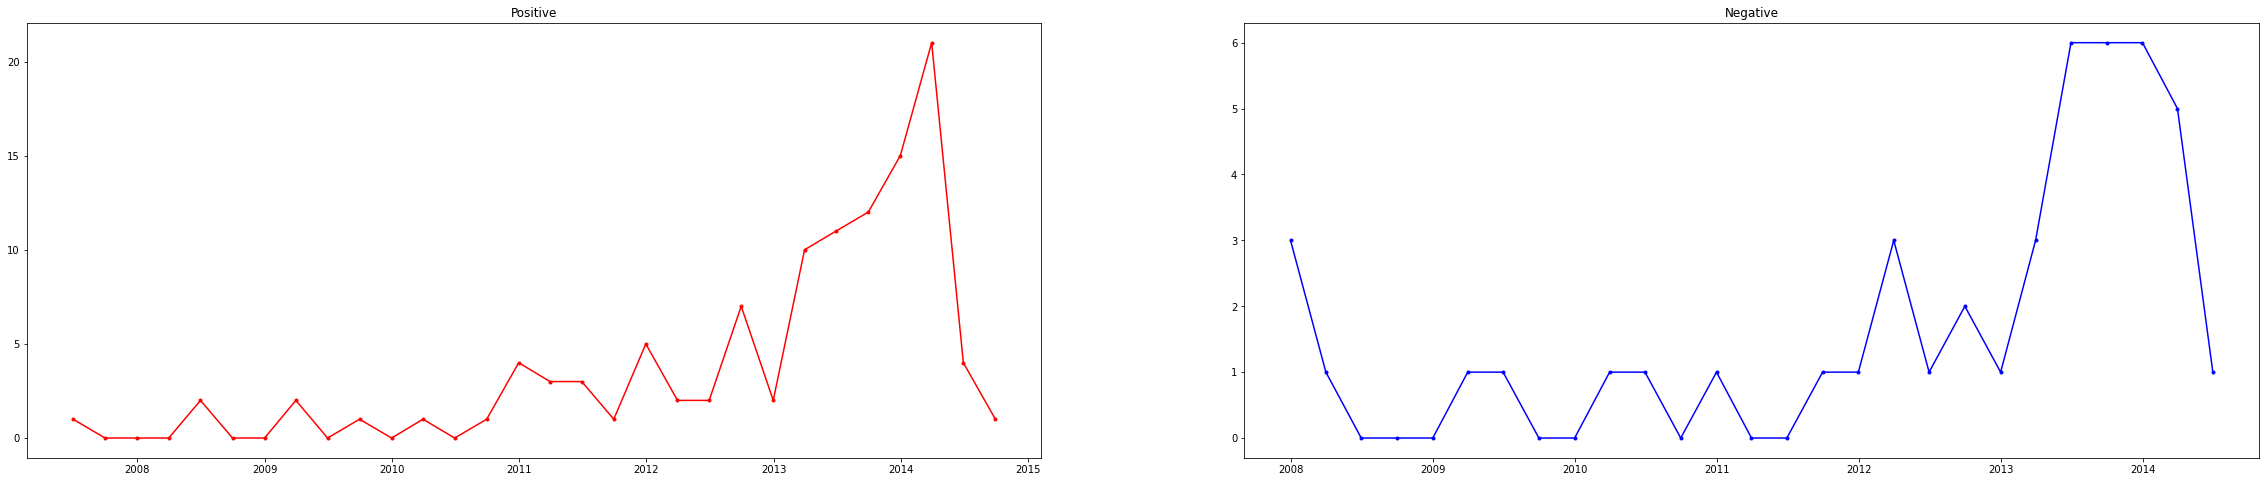

In [432]:
fig,ax = plt.subplots(1,2,figsize = (40,8))
ax[0].plot(p_data,color='r',marker ='.')
ax[0].set_title('Positive')
ax[1].plot(n_data,color='b',marker ='.')
ax[1].set_title('Negative')

plt.show()

FUNCTION FOR CHECKING STATIONARITY

In [433]:
def check_station(data):
    d = adfuller(data)[1] # We are interested in the second value (p value)
    if d <= 0.05:
        p = print(f'The prob {adfuller(data)[1]} is less than 0.05, The data is stationary')
    if d > 0.05:
        p = print(f'The prob {adfuller(data)[1]} is more than 0.05, The data is not stationary')
        
    return p

POSITIVE SENTIMENT OF HOME AND KITCHEN

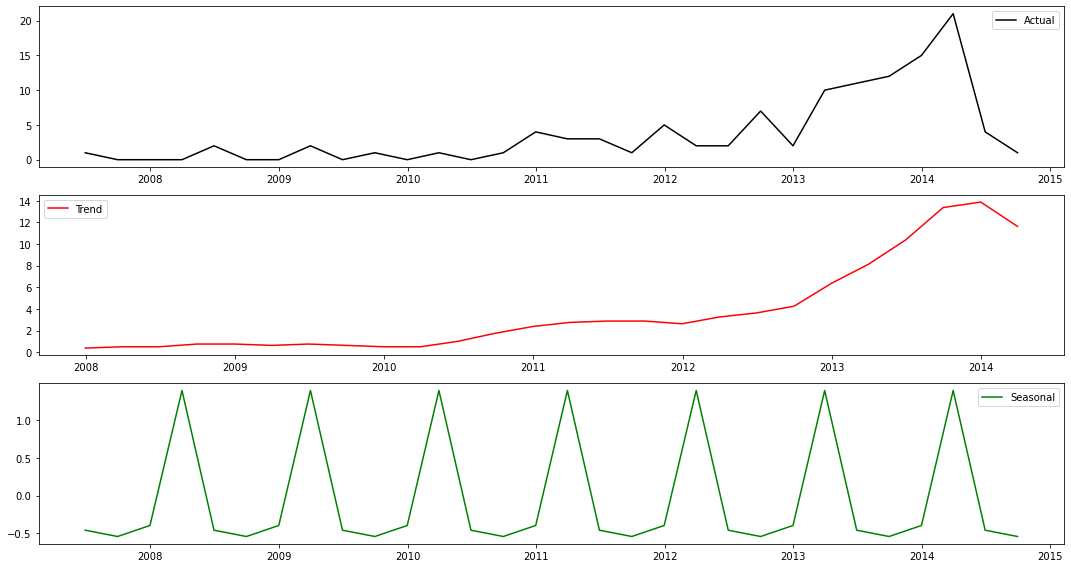

In [434]:
# Decomposing the data
decomp = seasonal_decompose(p_data,period=4)

d_sea = decomp.seasonal
d_tren = decomp.trend


fig,ax = plt.subplots(2,2,figsize = (15,8))


plt.subplot(311)
plt.plot(p_data,label = 'Actual',color = 'black')
plt.legend()

plt.subplot(312)
plt.plot(d_tren,label = 'Trend',color = 'r')
plt.legend()

plt.subplot(313)
plt.plot(d_sea,label = 'Seasonal',color = 'g')
plt.legend()



plt.tight_layout()
plt.show()

In [435]:
check_station(p_data)

The prob 0.9960370155827136 is more than 0.05, The data is not stationary


In [436]:
from statsmodels.tsa.statespace.tools import diff

dif_p = diff(p_data, k_seasonal_diff=5)
check_station(dif_p)

The prob 0.0003078358178867559 is less than 0.05, The data is stationary


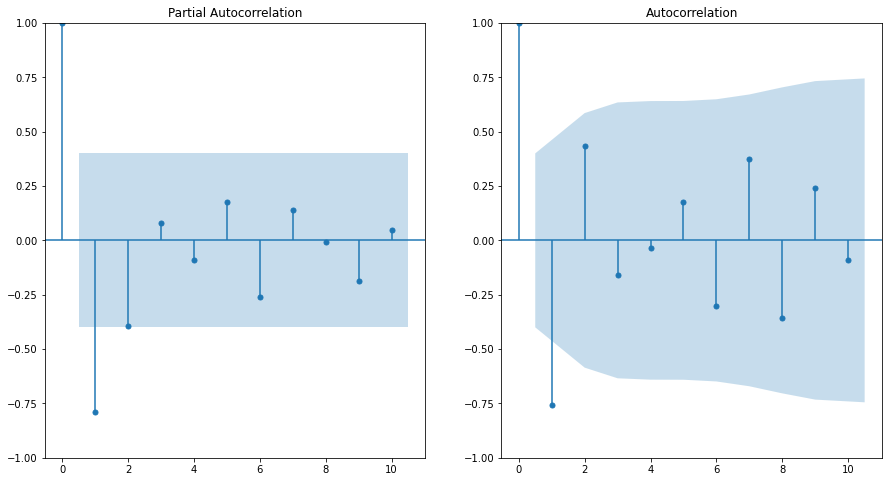

In [437]:
# plotting using plot_acf function
fig,ax = plt.subplots(1,2,figsize = (15,8))

# PACF
plot_pacf(dif_p,lags=10, ax = ax[0])

#ACF
plot_acf(dif_p,lags=10,ax = ax[1])


plt.show()

In [438]:
P, D, Q, M = 2, 1, 1, 4

In [439]:
from pmdarima.arima import auto_arima
# auto ARIMA (to help in the selection of p,d,q)
m1 = auto_arima(p_data, seasonal=True,m=4, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=161.733, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=159.649, Time=0.03 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=156.720, Time=0.03 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=162.063, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=158.820, Time=0.02 sec
 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=158.661, Time=0.06 sec
 ARIMA(0,0,1)(0,1,2)[4] intercept   : AIC=158.602, Time=0.05 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=158.944, Time=0.03 sec
 ARIMA(0,0,1)(1,1,2)[4] intercept   : AIC=160.191, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=159.349, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=158.654, Time=0.05 sec
 ARIMA(0,0,2)(0,1,1)[4] intercept   : AIC=158.654, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=156.996, Time=0.04 sec
 ARIMA(1,0,2)(0,1,1)[4] intercept   : AIC=160.652, 

In [476]:
ratio = int(0.8*len(p_data))
train_hp = p_data[:ratio]
test_hp = p_data[ratio:]

print(f'Train = {train_hp.shape} | Test = {test_hp.shape}')

Train = (24,) | Test = (7,)


In [477]:
sarima_pos = sm.tsa.statespace.SARIMAX(train_hp,order=(0,1,2),seasonal_order=(0,0,2,4)).fit()
sarima_pos_pred = sarima_pos.predict(start=0,end = len(train_hp)).shift(-2)
sarima_pos_pred

2007-06-30    0.671482
2007-09-30    0.481901
2007-12-31   -0.164999
2008-03-31    0.004255
2008-06-30    1.291622
2008-09-30    1.140673
2008-12-31   -0.043449
2009-03-31    0.953337
2009-06-30    0.982501
2009-09-30    0.326411
2009-12-31    0.658141
2010-03-31    0.436027
2010-06-30    0.356450
2010-09-30    0.831163
2010-12-31    3.430642
2011-03-31    4.367379
2011-06-30    2.932710
2011-09-30    1.580153
2011-12-31    2.570157
2012-03-31    3.581522
2012-06-30    2.508641
2012-09-30    5.427648
2012-12-31    5.240223
2013-03-31         NaN
2013-06-30         NaN
Freq: Q-DEC, Name: predicted_mean, dtype: float64

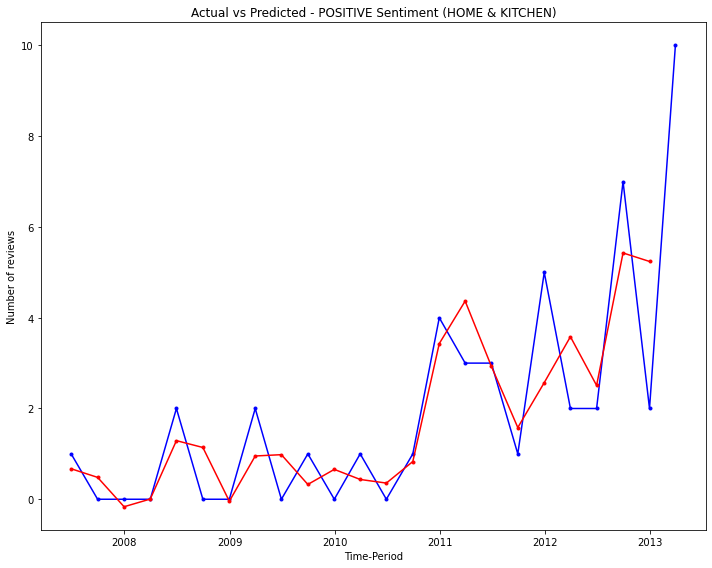

In [478]:
fig,ax = plt.subplots(figsize = (10,8))

plt.subplot(111)
plt.plot(train_hp, marker = '.',c = 'blue')
plt.plot(sarima_pos_pred, marker = '.',c = 'red')
plt.title('Actual vs Predicted - POSITIVE Sentiment (HOME & KITCHEN)')
plt.xlabel('Time-Period')
plt.ylabel('Number of reviews')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'FORECAST FOR POSITIVE REVIEWS BASED ON SENTIMENTS (HOME AND KITCHEN)')

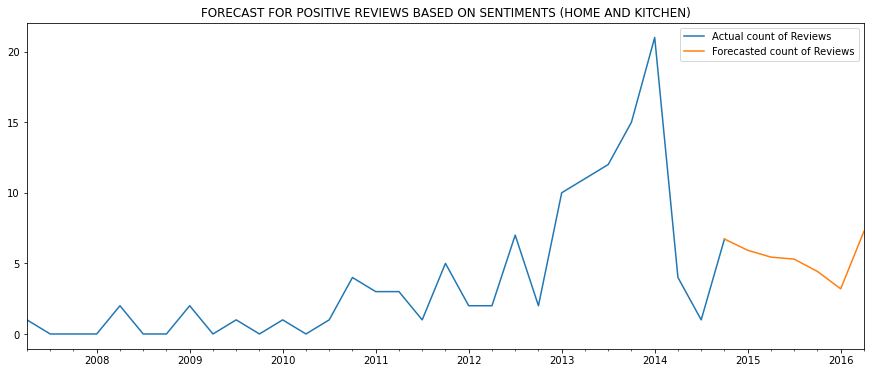

In [443]:
model2_t = sm.tsa.statespace.SARIMAX(p_data,order=(0,1,2),seasonal_order=(0,0,2,4)).fit()
pred = model2_t.predict(start=len(p_data), end=len(p_data)+6)
p_data = pd.concat([p_data, pred[:1]], axis=0)
p_data.plot(figsize=(15,6),label = 'Actual count of Reviews',legend=True)
pred.plot(label = 'Forecasted count of Reviews', legend=True)
plt.title('FORECAST FOR POSITIVE REVIEWS BASED ON SENTIMENTS (HOME AND KITCHEN)')

NEGATIVE SENTIMENT OF HOME AND KITCHEN DATA 

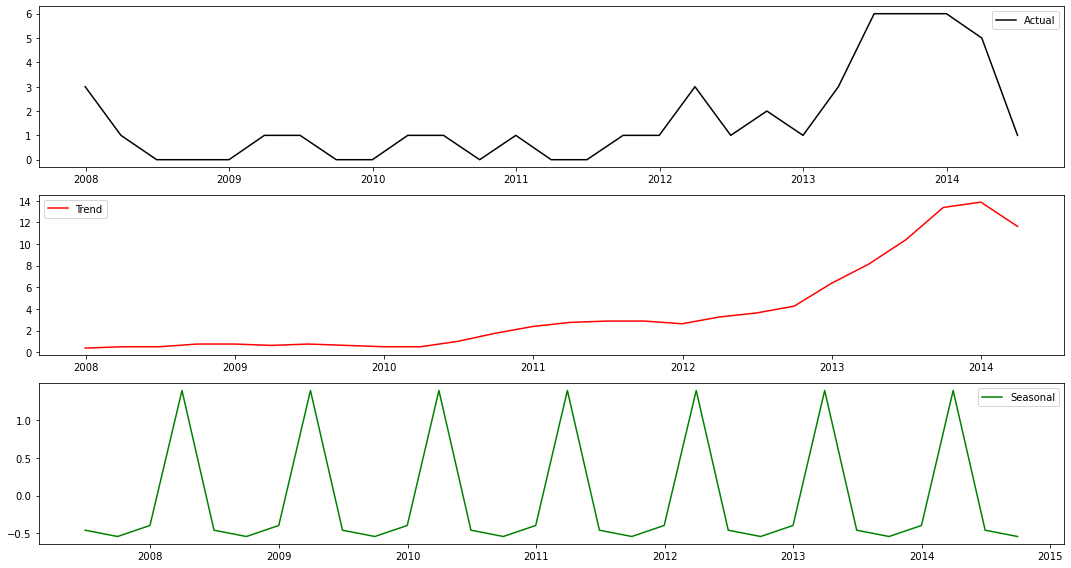

In [444]:
# Decomposing the data
decomp4 = seasonal_decompose(n_data,period=4)

d_sea4 = decomp4.seasonal
d_tren4 = decomp4.trend


fig,ax = plt.subplots(2,2,figsize = (15,8))


plt.subplot(311)
plt.plot(n_data,label = 'Actual',color = 'black')
plt.legend()

plt.subplot(312)
plt.plot(d_tren,label = 'Trend',color = 'r')
plt.legend()

plt.subplot(313)
plt.plot(d_sea,label = 'Seasonal',color = 'g')
plt.legend()



plt.tight_layout()
plt.show()

In [445]:
check_station(n_data)

The prob 0.3070559735669237 is more than 0.05, The data is not stationary


In [446]:
dif_n = diff(n_data, k_seasonal_diff=2)
check_station(dif_n)

The prob 4.922135452210895e-10 is less than 0.05, The data is stationary


In [447]:
check_station(diff(n_data, k_diff=3))

The prob 4.922135452210895e-10 is less than 0.05, The data is stationary


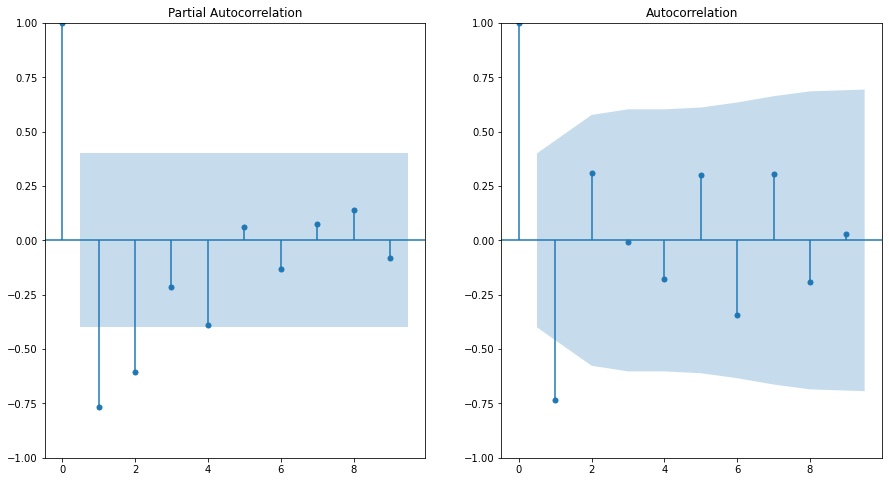

In [448]:
# plotting using plot_acf function
fig,ax = plt.subplots(1,2,figsize = (15,8))

# PACF
plot_pacf(diff(n_data, k_diff=3),lags=9,ax = ax[0])

#ACF
plot_acf(diff(n_data, k_diff=3),lags=9,ax = ax[1])


plt.show()

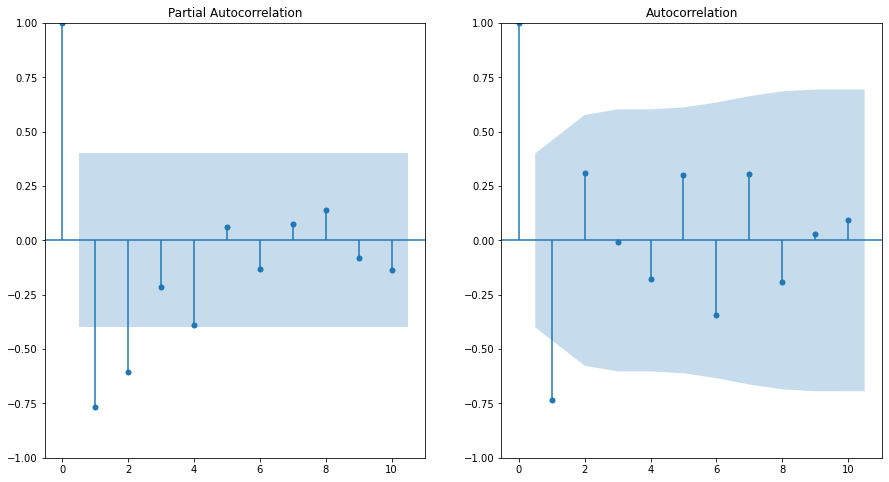

In [449]:
# plotting using plot_acf function
fig,ax = plt.subplots(1,2,figsize = (15,8))

# PACF
plot_pacf(dif_n,lags=10,ax = ax[0])

#ACF
plot_acf(dif_n,lags=10,ax = ax[1])


plt.show()

In [450]:
ratio_n = int(0.8*len(n_data))
train_n = n_data[:ratio_n]
test_n = n_data[ratio_n:]

print(f'Train = {train_n.shape} | Test = {test_n.shape}')

Train = (21,) | Test = (6,)


In [451]:
m2 = auto_arima(n_data, seasonal=True,m=4, trace=True)
print(m2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95.730, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94.233, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94.692, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=93.807, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=92.431, Time=0.02 sec
 ARIMA(0,1,0)(2,0,0)[4] intercept   : AIC=94.120, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=94.224, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=92.810, Time=0.02 sec
 ARIMA(0,1,0)(2,0,1)[4] intercept   : AIC=96.055, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=94.274, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=95.341, Time=0.07 sec
 ARIMA(0,1,0)(1,0,0)[4]             : AIC=90.459, Time=0.01 sec
 ARIMA(0,1,0)(2,0,0)[4]             : AIC=92.175, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[4]             : AIC=92.271, Time=0.02 sec


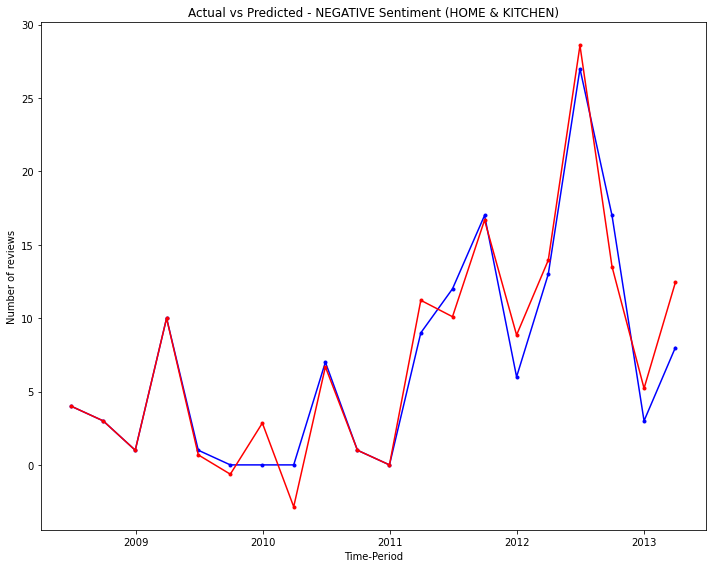

In [479]:
fig,ax = plt.subplots(figsize = (10,8))

model_test2 = sm.tsa.statespace.SARIMAX(train_n, order=(0,1,0),seasonal_order=(1,0,0,4)).fit()
test_neg_pred = model_test2.predict(start=0,end = len(train_n)).shift(-1)

plt.subplot(111)
plt.plot(train_n, marker = '.',c = 'blue')
plt.plot(test_neg_pred, marker = '.',c = 'red')
plt.title('Actual vs Predicted - NEGATIVE Sentiment (HOME & KITCHEN)')
plt.xlabel('Time-Period')
plt.ylabel('Number of reviews')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'FORECAST FOR NEGATIVE REVIEWS BASED ON SENTIMENTS (HOME AND KITCHEN)')

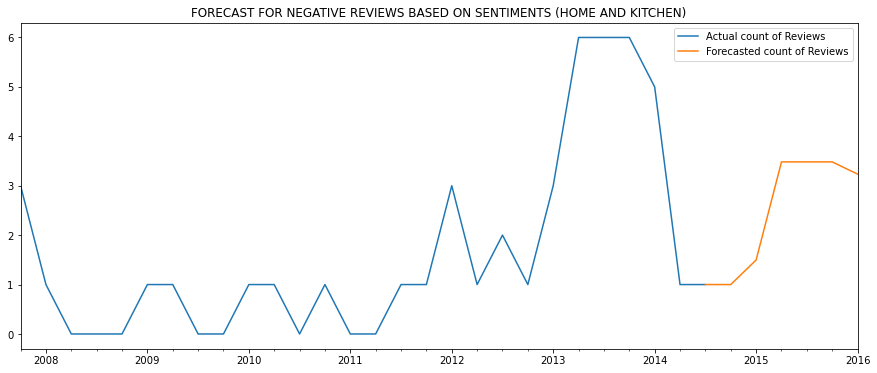

In [453]:
model3_t = sm.tsa.statespace.SARIMAX(n_data,order=(0,1,0),seasonal_order=(1,0,0,4)).fit()
pred_n = model3_t.predict(start=len(n_data), end=len(n_data)+6)
n_data = pd.concat([n_data, pred_n[:1]], axis=0)
n_data.plot(figsize=(15,6),label = 'Actual count of Reviews',legend=True)
pred_n.plot(label = 'Forecasted count of Reviews', legend=True)
plt.title('FORECAST FOR NEGATIVE REVIEWS BASED ON SENTIMENTS (HOME AND KITCHEN)')

RESAMPLING GROCERY DATA FEEDBACKS

In [454]:
#monthly_hp = hp.resample('MS').count()
monthly_p_1 = p_1.resample('q').count()
#monthly_nu = nu.resample('MS').count()
monthly_n_1 = n_1.resample('q').count()
#monthly_hn = hn.resample('MS').count()

In [455]:
#hp_data = monthly_hp['Feedback']
p_data_1 = monthly_p_1['Feedback']
#nu_data = monthly_nu['Feedback']
n_data_1 = monthly_n_1['Feedback']
#hn_data = monthly_hn['Feedback']

In [456]:
n_data_1

Review_Time
2008-06-30     4
2008-09-30     3
2008-12-31     1
2009-03-31    10
2009-06-30     1
2009-09-30     0
2009-12-31     0
2010-03-31     0
2010-06-30     7
2010-09-30     1
2010-12-31     0
2011-03-31     9
2011-06-30    12
2011-09-30    17
2011-12-31     6
2012-03-31    13
2012-06-30    27
2012-09-30    17
2012-12-31     3
2013-03-31     8
2013-06-30    15
2013-09-30     8
2013-12-31     8
2014-03-31     4
2014-06-30     1
Freq: Q-DEC, Name: Feedback, dtype: int64

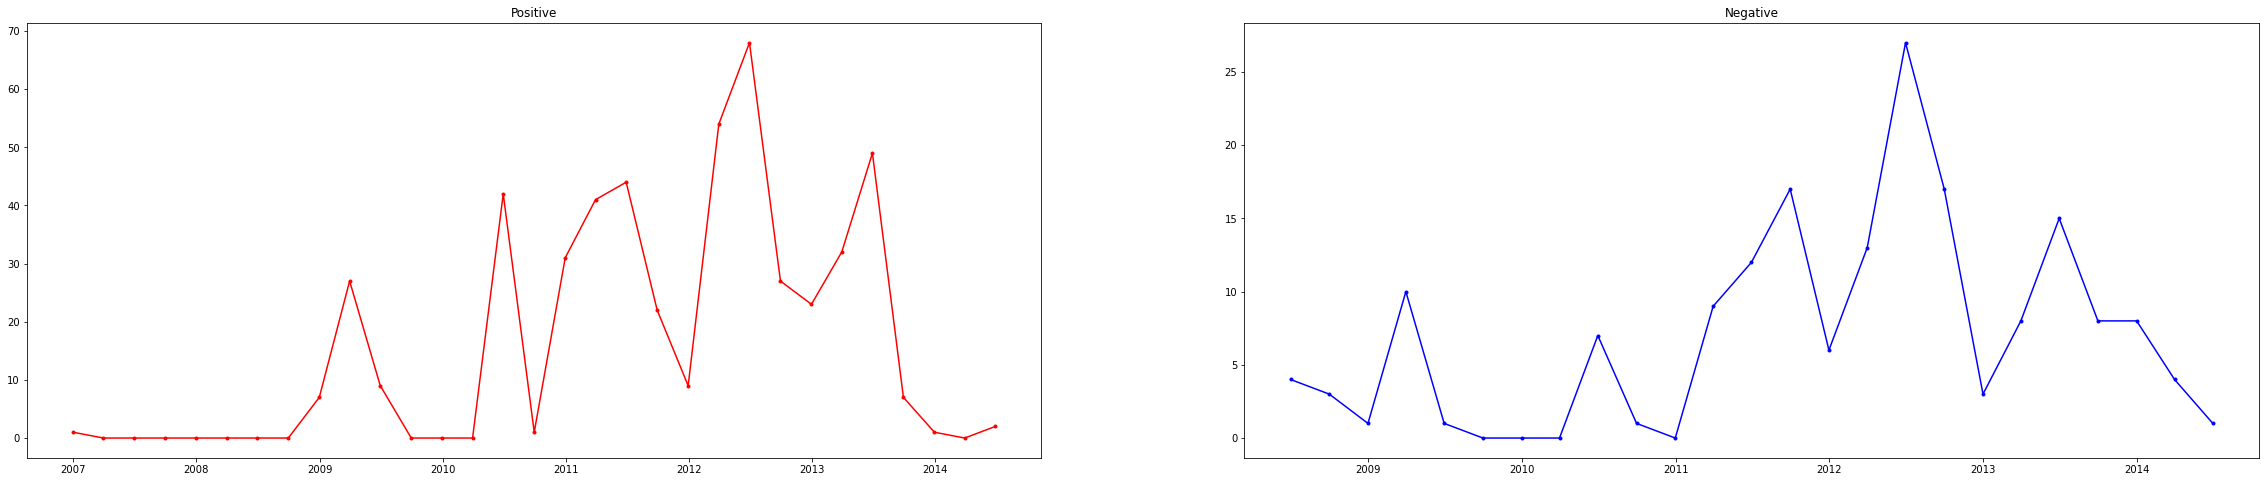

In [457]:
fig,ax = plt.subplots(1,2,figsize = (40,8))
ax[0].plot(p_data_1,color='r',marker ='.')
ax[0].set_title('Positive')
ax[1].plot(n_data_1,color='b',marker ='.')
ax[1].set_title('Negative')

plt.show()

POSITIVE SENTIMENT OF GROCERY DATA

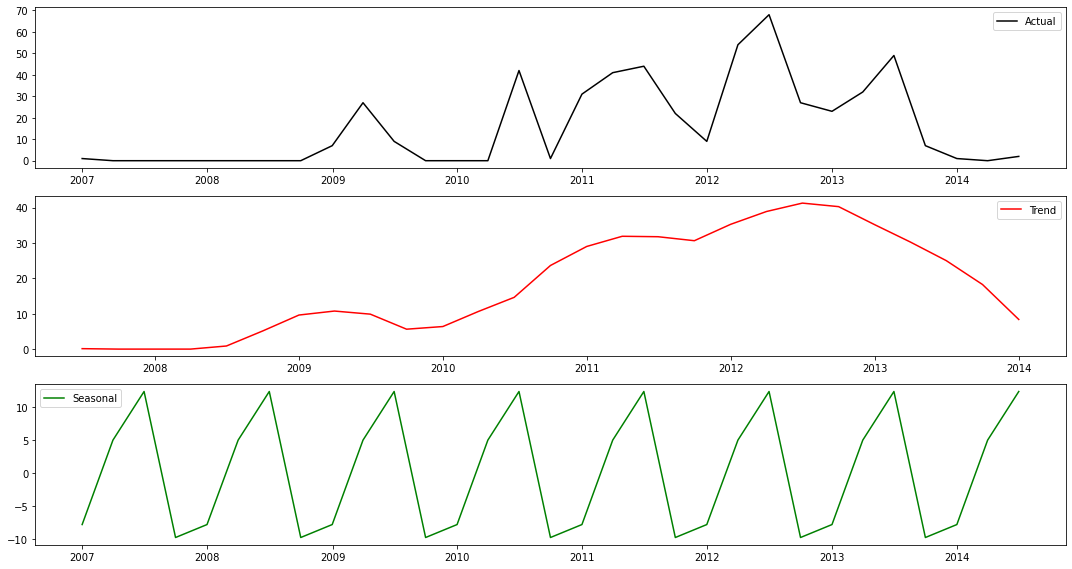

In [458]:
# Decomposing the data
decomp = seasonal_decompose(p_data_1,period=4)

d_sea = decomp.seasonal
d_tren = decomp.trend


fig,ax = plt.subplots(2,2,figsize = (15,8))


plt.subplot(311)
plt.plot(p_data_1,label = 'Actual',color = 'black')
plt.legend()

plt.subplot(312)
plt.plot(d_tren,label = 'Trend',color = 'r')
plt.legend()

plt.subplot(313)
plt.plot(d_sea,label = 'Seasonal',color = 'g')
plt.legend()



plt.tight_layout()
plt.show()

In [459]:
check_station(p_data_1)

The prob 0.026813574687303516 is less than 0.05, The data is stationary


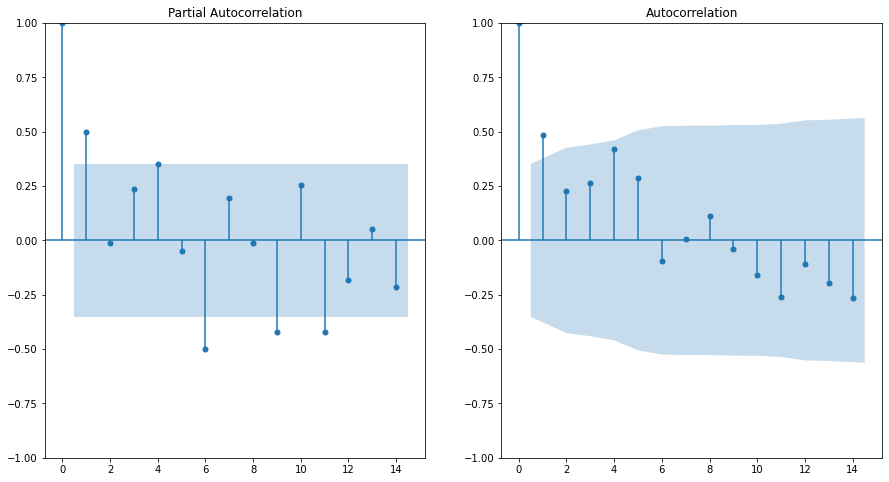

In [460]:
# plotting using plot_acf function
fig,ax = plt.subplots(1,2,figsize = (15,8))

# PACF
plot_pacf(p_data_1,lags=14,ax = ax[0])

#ACF
plot_acf(p_data_1,lags=14,ax = ax[1])


plt.show()

In [480]:
ratio = int(0.8*len(p_data_1))
train_hp = p_data_1[:ratio]
test_hp = p_data_1[ratio:]

print(f'Train = {train_hp.shape} | Test = {test_hp.shape}')

Train = (25,) | Test = (7,)


In [462]:
m3 = auto_arima(p_data_1, seasonal=True,m=4, trace=True)
print(m3.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=268.115, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=269.017, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=263.838, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=263.211, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=267.017, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=264.474, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=262.704, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=261.571, Time=0.04 sec
 ARIMA(0,1,1)(2,0,0)[4] intercept   : AIC=262.369, Time=0.06 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=264.365, Time=0.10 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=267.182, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=263.514, Time=0.07 sec
 ARIMA(0,1,2)(1,0,0)[4] intercept   : AIC=263.512, Time=0.06 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[4]             : AIC=259.637, 

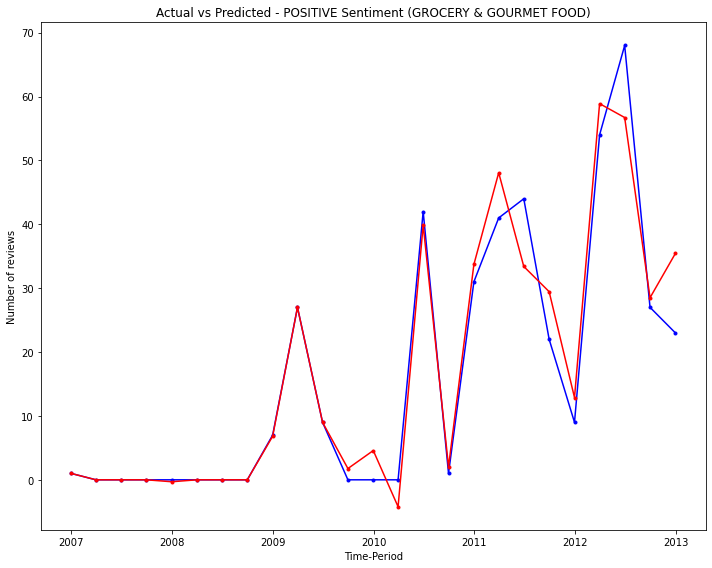

In [481]:
fig,ax = plt.subplots(figsize = (10,8))

model_test3 = sm.tsa.statespace.SARIMAX(train_hp, order=(0,1,0),seasonal_order=(1,0,1,4)).fit()
test_pos_pred = model_test3.predict(start=0,end = len(train_hp)).shift(-1)

plt.subplot(111)
plt.plot(train_hp, marker = '.',c = 'blue')
plt.plot(test_pos_pred, marker = '.',c = 'red')
plt.title('Actual vs Predicted - POSITIVE Sentiment (GROCERY & GOURMET FOOD)')
plt.xlabel('Time-Period')
plt.ylabel('Number of reviews')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'FORECAST FOR POSITIVE REVIEW BASED ON SENTIMENTS (GROCERY & GOURMET FOOD)')

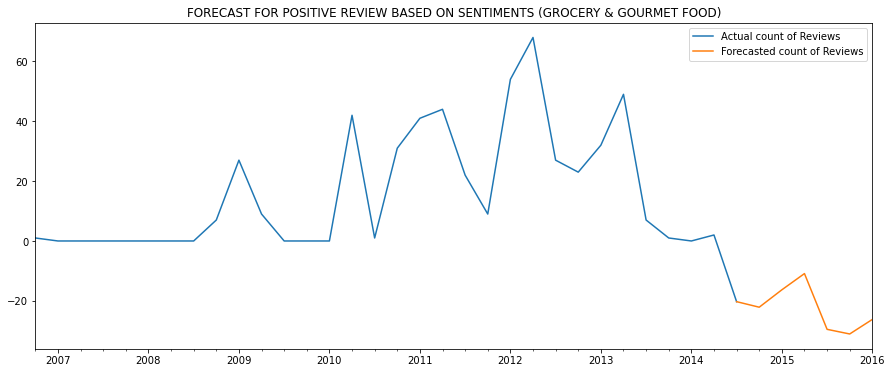

In [464]:
model4_t = sm.tsa.statespace.SARIMAX(p_data_1,order=(0,1,0),seasonal_order=(1,0,1,4)).fit()
pred_p1 = model4_t.predict(start=len(p_data_1), end=len(p_data_1)+6)
p_data_1 = pd.concat([p_data_1, pred_p1[:1]], axis=0)
p_data_1.plot(figsize=(15,6),label = 'Actual count of Reviews',legend=True)
pred_p1.plot(label = 'Forecasted count of Reviews', legend=True)
plt.title('FORECAST FOR POSITIVE REVIEW BASED ON SENTIMENTS (GROCERY & GOURMET FOOD)')

NEGATIVE SENTIMENT OF GROCERY DATA

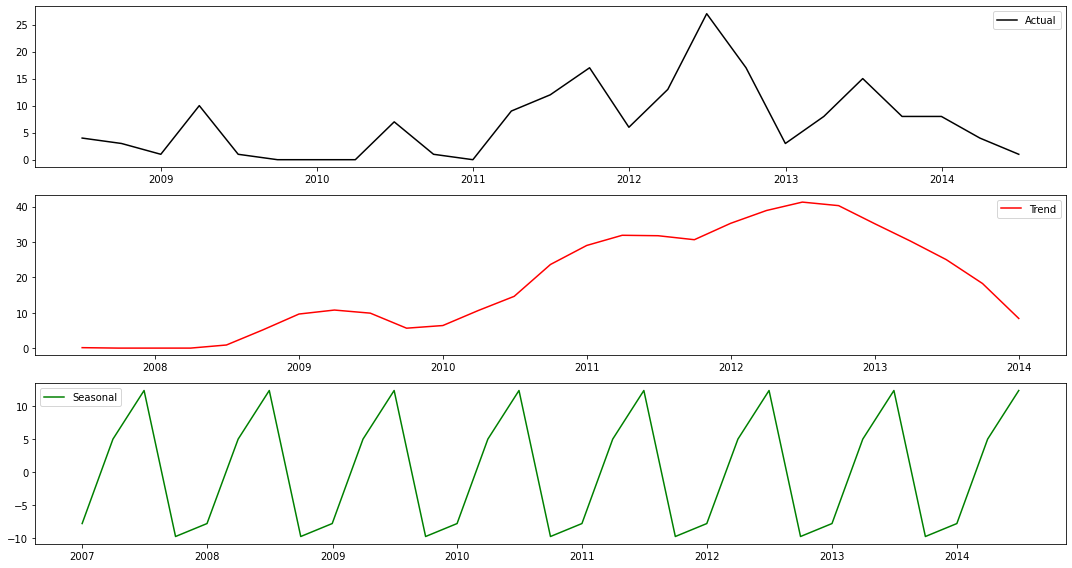

In [465]:
# Decomposing the data
decomp4 = seasonal_decompose(n_data_1,period=4)

d_sea4 = decomp4.seasonal
d_tren4 = decomp4.trend


fig,ax = plt.subplots(2,2,figsize = (15,8))


plt.subplot(311)
plt.plot(n_data_1,label = 'Actual',color = 'black')
plt.legend()

plt.subplot(312)
plt.plot(d_tren,label = 'Trend',color = 'r')
plt.legend()

plt.subplot(313)
plt.plot(d_sea,label = 'Seasonal',color = 'g')
plt.legend()



plt.tight_layout()
plt.show()

In [466]:
check_station(n_data_1)

The prob 0.9774072921290118 is more than 0.05, The data is not stationary


In [467]:
dif_n_1 = diff(n_data_1, k_diff=1)
check_station(dif_n_1)

The prob 0.0009720120092574762 is less than 0.05, The data is stationary


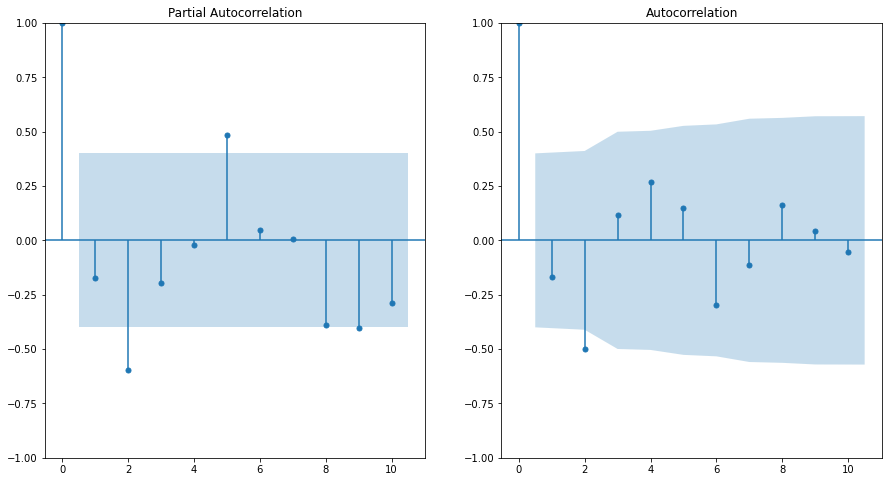

In [468]:
# plotting using plot_acf function
fig,ax = plt.subplots(1,2,figsize = (15,8))

# PACF
plot_pacf(dif_n_1,lags=10,ax = ax[0])

#ACF
plot_acf(dif_n_1,lags=10,ax = ax[1])


plt.show()

In [482]:
ratio_n = int(0.8*len(n_data_1))
train_n = n_data_1[:ratio_n]
test_n = n_data_1[ratio_n:]

print(f'Train = {train_n.shape} | Test = {test_n.shape}')

Train = (20,) | Test = (6,)


In [470]:
m4 = auto_arima(n_data_1, seasonal=True,m=4, trace=True)
print(m4.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=170.030, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=170.269, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=165.923, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=164.801, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=186.604, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=163.826, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[4] intercept   : AIC=164.980, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[4] intercept   : AIC=166.785, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=165.651, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[4] intercept   : AIC=165.704, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=166.295, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[4] intercept   : AIC=167.644, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[4]             : AIC=171.617, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[4] intercept
Total fit time: 1.118 seconds
                               SARI

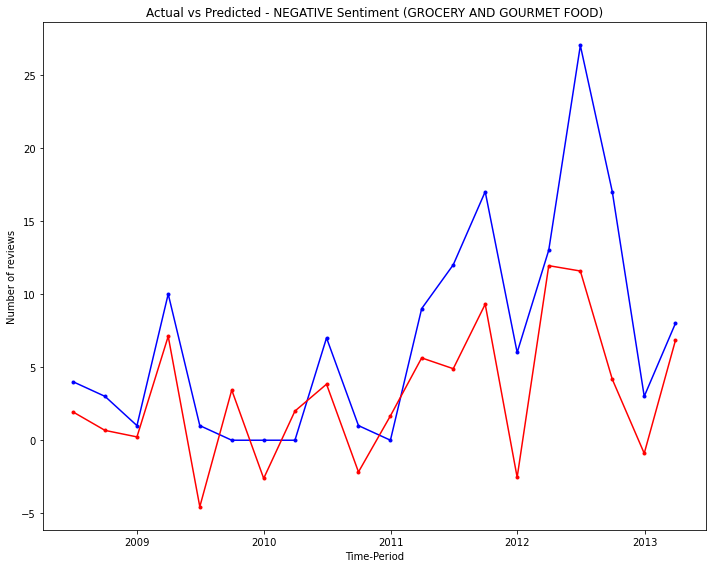

In [483]:
fig,ax = plt.subplots(figsize = (10,8))

model_test4 = sm.tsa.statespace.SARIMAX(train_n, order=(0,0,1),seasonal_order=(0,0,0,4)).fit()
test_ng_pred = model_test4.predict(start=0,end = len(train_n)).shift(-1)

plt.subplot(111)
plt.plot(train_n, marker = '.',c = 'blue')
plt.plot(test_ng_pred, marker = '.',c = 'red')
plt.title('Actual vs Predicted - NEGATIVE Sentiment (GROCERY AND GOURMET FOOD)')
plt.xlabel('Time-Period')
plt.ylabel('Number of reviews')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'FORECAST FOR NEGATIVE REVIEW BASED ON SENTIMENTS (GROCERY & GOURMET FOOD)')

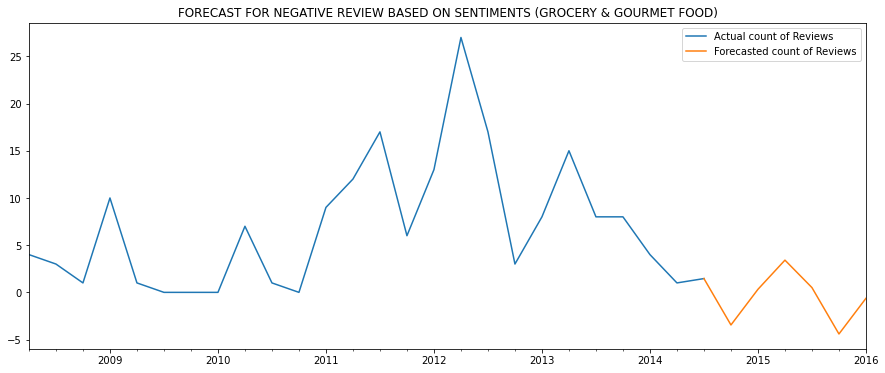

In [472]:
model5_t = sm.tsa.statespace.SARIMAX(n_data_1,order=(0,1,1),seasonal_order=(0,1,1,4)).fit()
pred_n1 = model5_t.predict(start=len(n_data_1), end=len(n_data_1)+6)
n_data_1 = pd.concat([n_data_1, pred_n1[:1]], axis=0)
n_data_1.plot(figsize=(15,6),label = 'Actual count of Reviews',legend=True)
pred_n1.plot(label = 'Forecasted count of Reviews', legend=True)
plt.title('FORECAST FOR NEGATIVE REVIEW BASED ON SENTIMENTS (GROCERY & GOURMET FOOD)')